# EDA - Fraud E-commerce Data

## Task 1: Data Analysis and Preprocessing

**Objective**: Prepare clean, feature-rich datasets ready for modeling by exploring the data, engineering meaningful features, and handling class imbalance.

This notebook focuses on:
- Data Cleaning (missing values, duplicates, data types)
- Exploratory Data Analysis
- Feature Engineering
- Handling Class Imbalance

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load the Data


In [2]:
# Define paths
data_dir = Path('../data')
raw_data_path = data_dir / 'raw' / 'Fraud_Data.csv'
processed_data_path = data_dir / 'processed'

# Create processed directory if it doesn't exist
processed_data_path.mkdir(parents=True, exist_ok=True)

# Load the dataset
print("Loading fraud e-commerce dataset...")
df = pd.read_csv(raw_data_path)

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Loading fraud e-commerce dataset...

Dataset loaded successfully!
Shape: (151112, 11)

First few rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## 2. Initial Data Exploration


In [3]:
# Basic information about the dataset
print("=" * 120)
print("DATASET INFORMATION")
print("=" * 120)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names:")
print(df.columns.tolist())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nDataset Info:")
df.info()


DATASET INFORMATION

Shape: 151112 rows × 11 columns

Column Names:
['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

Data Types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  

In [4]:
# Statistical summary
print("=" * 120)
print("STATISTICAL SUMMARY")
print("=" * 120)
df.describe(include='all')


STATISTICAL SUMMARY


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-02-24 22:55:49,2015-07-17 23:22:55,NaN,NGQCKIADMZORL,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


## 3. Data Cleaning

### 3.1 Check for Missing Values


In [4]:
# Check for missing values
print("=" * 120)
print("MISSING VALUES ANALYSIS")
print("=" * 120)

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df)
else:
    print("\n✓ No missing values found in the dataset!")

# Visualize missing values if any exist
if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df, x='Column', y='Missing Percentage')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!


### 3.2 Handle Missing Values

**Strategy**: 
- For numerical columns: Use median imputation (robust to outliers)
- For categorical columns: Use mode imputation or mark as 'Unknown'
- For datetime columns: Drop rows if critical, otherwise forward fill
- **Justification**: We'll handle missing values based on the column type and business logic


In [5]:
# Store original shape
original_shape = df.shape
print(f"Original dataset shape: {original_shape}")

# Handle missing values based on column type
if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    
    # Numerical columns - use median imputation
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  - Filled {col} with median: {median_val}")
    
    # Categorical columns - use mode imputation
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
            df[col].fillna(mode_val, inplace=True)
            print(f"  - Filled {col} with mode: {mode_val}")
    
    # Verify no missing values remain
    remaining_missing = df.isnull().sum().sum()
    print(f"\n✓ Missing values handled. Remaining missing: {remaining_missing}")
else:
    print("\n✓ No missing values to handle!")


Original dataset shape: (151112, 11)

✓ No missing values to handle!


### 3.3 Remove Duplicates


In [6]:
# Check for duplicate rows
print("=" * 120)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 120)

duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    duplicate_percent = (duplicate_count / len(df)) * 100
    print(f"Percentage of duplicates: {duplicate_percent:.2f}%")
    
    # Show some duplicate examples
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
    
    # Remove duplicates
    print(f"\nRemoving {duplicate_count} duplicate rows...")
    df = df.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {df.shape}")
else:
    print("\n✓ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS

Number of duplicate rows: 0

✓ No duplicate rows found!


### 3.4 Correct Data Types

**Strategy**:
- Convert `signup_time` and `purchase_time` to datetime
- Ensure `user_id` is integer
- Ensure `purchase_value` is numeric
- Ensure `age` is integer
- Ensure `class` is integer (binary: 0 or 1)
- Convert categorical columns to appropriate types


In [7]:
# Store data types before conversion
print("=" * 120)
print("DATA TYPE CORRECTION")
print("=" * 120)
print("\nOriginal data types:")
print(df.dtypes)


DATA TYPE CORRECTION

Original data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


In [8]:
# Convert datetime columns
print("\nConverting datetime columns...")
df['signup_time'] = pd.to_datetime(df['signup_time'], errors='coerce')
df['purchase_time'] = pd.to_datetime(df['purchase_time'], errors='coerce')

# Check for any conversion errors
datetime_errors = df[['signup_time', 'purchase_time']].isnull().sum()
if datetime_errors.sum() > 0:
    print(f"  ⚠ Warning: {datetime_errors.sum()} rows have invalid datetime values")
    # Drop rows with invalid datetime if critical
    if datetime_errors.sum() < len(df) * 0.01:  # Less than 1% of data
        df = df.dropna(subset=['signup_time', 'purchase_time'])
        print(f"  - Dropped {datetime_errors.sum()} rows with invalid datetime")
    else:
        print(f"  - Keeping rows, will handle in feature engineering")
else:
    print("  ✓ Datetime conversion successful!")

print(f"\nAfter datetime conversion shape: {df.shape}")



Converting datetime columns...
  ✓ Datetime conversion successful!

After datetime conversion shape: (151112, 11)


In [9]:
# Convert numeric columns to appropriate types
print("\nConverting numeric columns...")

# User ID - should be integer
if df['user_id'].dtype != 'int64':
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce').astype('Int64')
    print("  ✓ user_id converted to integer")

# Purchase value - should be numeric
if df['purchase_value'].dtype not in ['int64', 'float64']:
    df['purchase_value'] = pd.to_numeric(df['purchase_value'], errors='coerce')
    print("  ✓ purchase_value converted to numeric")

# Age - should be integer
if df['age'].dtype != 'int64':
    df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
    print("  ✓ age converted to integer")

# IP address - keep as float (it's already numeric)
print("  ✓ ip_address kept as float")

# Class - should be integer (binary: 0 or 1)
if df['class'].dtype != 'int64':
    df['class'] = pd.to_numeric(df['class'], errors='coerce').astype('int64')
    print("  ✓ class converted to integer")



Converting numeric columns...
  ✓ ip_address kept as float


In [10]:
# Convert categorical columns
print("\nConverting categorical columns...")

categorical_columns = ['source', 'browser', 'sex', 'device_id']

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"  ✓ {col} converted to category")

print("\n" + "=" * 120)
print("FINAL DATA TYPES")
print("=" * 120)
print(df.dtypes)



Converting categorical columns...
  ✓ source converted to category
  ✓ browser converted to category
  ✓ sex converted to category
  ✓ device_id converted to category

FINAL DATA TYPES
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id               category
source                  category
browser                 category
sex                     category
age                        int64
ip_address               float64
class                      int64
dtype: object


### 3.5 Data Cleaning Summary


In [11]:
# Summary of data cleaning
print("=" * 120)
print("DATA CLEANING SUMMARY")
print("=" * 120)
print(f"\nOriginal dataset shape: {original_shape}")
print(f"Final dataset shape: {df.shape}")
print(f"Rows removed: {original_shape[0] - df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print(f"\n✓ Missing values: {df.isnull().sum().sum()}")
print(f"✓ Duplicate rows: {df.duplicated().sum()}")
print(f"\n✓ Data types corrected:")
print(f"  - Datetime: signup_time, purchase_time")
print(f"  - Integer: user_id, age, class")
print(f"  - Numeric: purchase_value, ip_address")
print(f"  - Categorical: source, browser, sex, device_id")

print(f"\n✓ Dataset is ready for further analysis!")
df.head()


DATA CLEANING SUMMARY

Original dataset shape: (151112, 11)
Final dataset shape: (151112, 11)
Rows removed: 0
Columns: 11

✓ Missing values: 0
✓ Duplicate rows: 0

✓ Data types corrected:
  - Datetime: signup_time, purchase_time
  - Integer: user_id, age, class
  - Numeric: purchase_value, ip_address
  - Categorical: source, browser, sex, device_id

✓ Dataset is ready for further analysis!


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## 4. Save Cleaned Dataset


In [12]:
# Save cleaned dataset
cleaned_file_path = processed_data_path / 'fraud_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"✓ Cleaned dataset saved to: {cleaned_file_path}")
print(f"  Shape: {df.shape}")
print(f"  File size: {cleaned_file_path.stat().st_size / (1024*1024):.2f} MB")


✓ Cleaned dataset saved to: ../data/processed/fraud_data_cleaned.csv
  Shape: (151112, 11)
  File size: 14.18 MB


## 5. Exploratory Data Analysis (EDA)

### 5.1 Class Distribution Analysis - Quantify the Imbalance


In [13]:
# Load cleaned data if not already loaded
if 'df' not in locals() or df is None:
    cleaned_file_path = processed_data_path / 'fraud_data_cleaned.csv'
    df = pd.read_csv(cleaned_file_path)
    # Convert datetime columns
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])

print("=" * 120)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 120)

# Class distribution
class_counts = df['class'].value_counts().sort_index()
class_percentages = df['class'].value_counts(normalize=True).sort_index() * 100

print(f"\nClass Distribution:")
print(f"{'Class':<10} {'Count':<15} {'Percentage':<15}")
print("-" * 60)
for idx in class_counts.index:
    print(f"{idx:<10} {class_counts[idx]:<15,} {class_percentages[idx]:<15.2f}%")

# Calculate imbalance ratio
fraud_count = class_counts.get(1, 0)
normal_count = class_counts.get(0, 0)
imbalance_ratio = normal_count / fraud_count if fraud_count > 0 else 0

print(f"\nImbalance Metrics:")
print(f"  - Normal transactions (Class 0): {normal_count:,}")
print(f"  - Fraud transactions (Class 1): {fraud_count:,}")
print(f"  - Imbalance Ratio: {imbalance_ratio:.2f}:1 (Normal:Fraud)")
print(f"  - Fraud Percentage: {class_percentages.get(1, 0):.2f}%")


CLASS DISTRIBUTION ANALYSIS

Class Distribution:
Class      Count           Percentage     
------------------------------------------------------------
0          136,961         90.64          %
1          14,151          9.36           %

Imbalance Metrics:
  - Normal transactions (Class 0): 136,961
  - Fraud transactions (Class 1): 14,151
  - Imbalance Ratio: 9.68:1 (Normal:Fraud)
  - Fraud Percentage: 9.36%


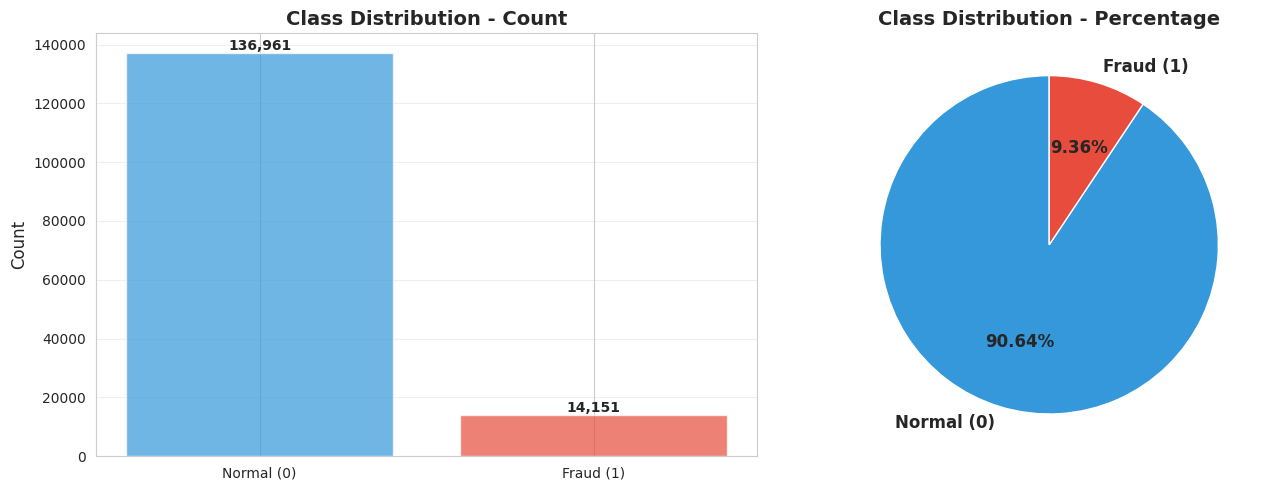


⚠ Class Imbalance Alert:
  - Moderate imbalance detected. Ratio is 9.68:1
  - Recommendation: Consider class weights or sampling techniques


In [14]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Normal (0)', 'Fraud (1)'], [normal_count, fraud_count], 
            color=['#3498db', '#e74c3c'], alpha=0.7)
axes[0].set_title('Class Distribution - Count', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate([normal_count, fraud_count]):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie([normal_count, fraud_count], 
            labels=['Normal (0)', 'Fraud (1)'],
            autopct='%1.2f%%',
            colors=['#3498db', '#e74c3c'],
            startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n⚠ Class Imbalance Alert:")
if imbalance_ratio > 10:
    print(f"  - Severe imbalance detected! Ratio is {imbalance_ratio:.2f}:1")
    print(f"  - Recommendation: Use techniques like SMOTE, undersampling, or class weights")
elif imbalance_ratio > 5:
    print(f"  - Moderate imbalance detected. Ratio is {imbalance_ratio:.2f}:1")
    print(f"  - Recommendation: Consider class weights or sampling techniques")
else:
    print(f"  - Relatively balanced dataset. Ratio is {imbalance_ratio:.2f}:1")


### 5.2 Univariate Analysis - Distributions of Key Variables


UNIVARIATE ANALYSIS - NUMERICAL VARIABLES


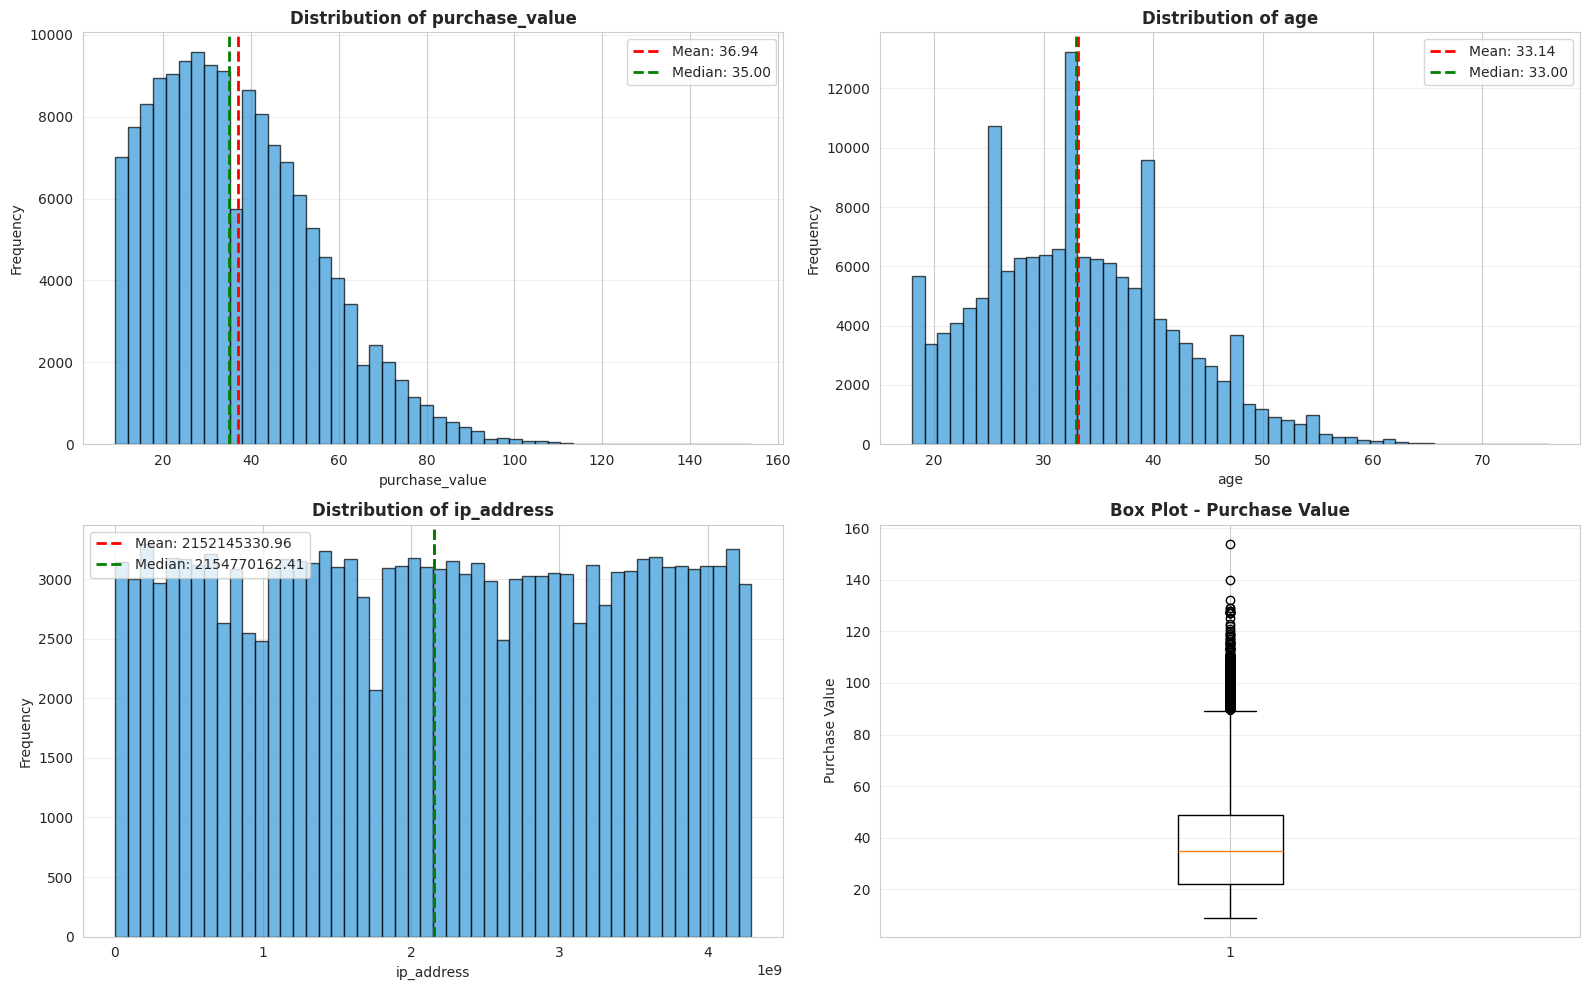


Statistical Summary of Numerical Variables:
       purchase_value            age    ip_address
count   151112.000000  151112.000000  1.511120e+05
mean        36.935372      33.140704  2.152145e+09
std         18.322762       8.617733  1.248497e+09
min          9.000000      18.000000  5.209350e+04
25%         22.000000      27.000000  1.085934e+09
50%         35.000000      33.000000  2.154770e+09
75%         49.000000      39.000000  3.243258e+09
max        154.000000      76.000000  4.294850e+09


In [15]:
# Numerical variables distribution
print("=" * 60)
print("UNIVARIATE ANALYSIS - NUMERICAL VARIABLES")
print("=" * 60)

numerical_vars = ['purchase_value', 'age', 'ip_address']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, var in enumerate(numerical_vars):
    if idx < len(axes):
        # Histogram
        axes[idx].hist(df[var], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(var, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add statistics
        mean_val = df[var].mean()
        median_val = df[var].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()

# Box plot for purchase_value
axes[3].boxplot(df['purchase_value'], vert=True)
axes[3].set_title('Box Plot - Purchase Value', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Purchase Value', fontsize=10)
axes[3].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary of Numerical Variables:")
print(df[numerical_vars].describe())


UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES


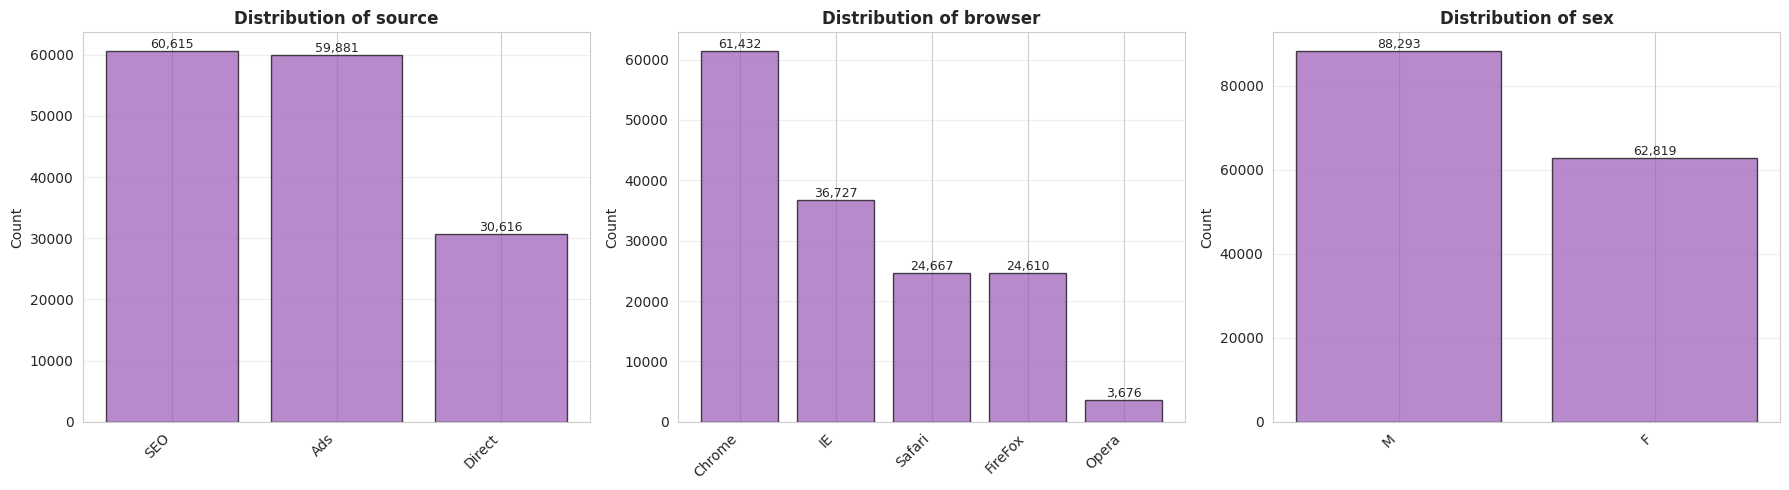


SOURCE Distribution:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
Unique values: 3

BROWSER Distribution:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64
Unique values: 5

SEX Distribution:
sex
M    88293
F    62819
Name: count, dtype: int64
Unique values: 2


In [16]:
# Categorical variables distribution
print("=" * 120)
print("UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES")
print("=" * 120)

categorical_vars = ['source', 'browser', 'sex']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, var in enumerate(categorical_vars):
    value_counts = df[var].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color='#9b59b6', alpha=0.7, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print value counts
for var in categorical_vars:
    print(f"\n{var.upper()} Distribution:")
    print(df[var].value_counts())
    print(f"Unique values: {df[var].nunique()}")


UNIVARIATE ANALYSIS - TIME-BASED FEATURES


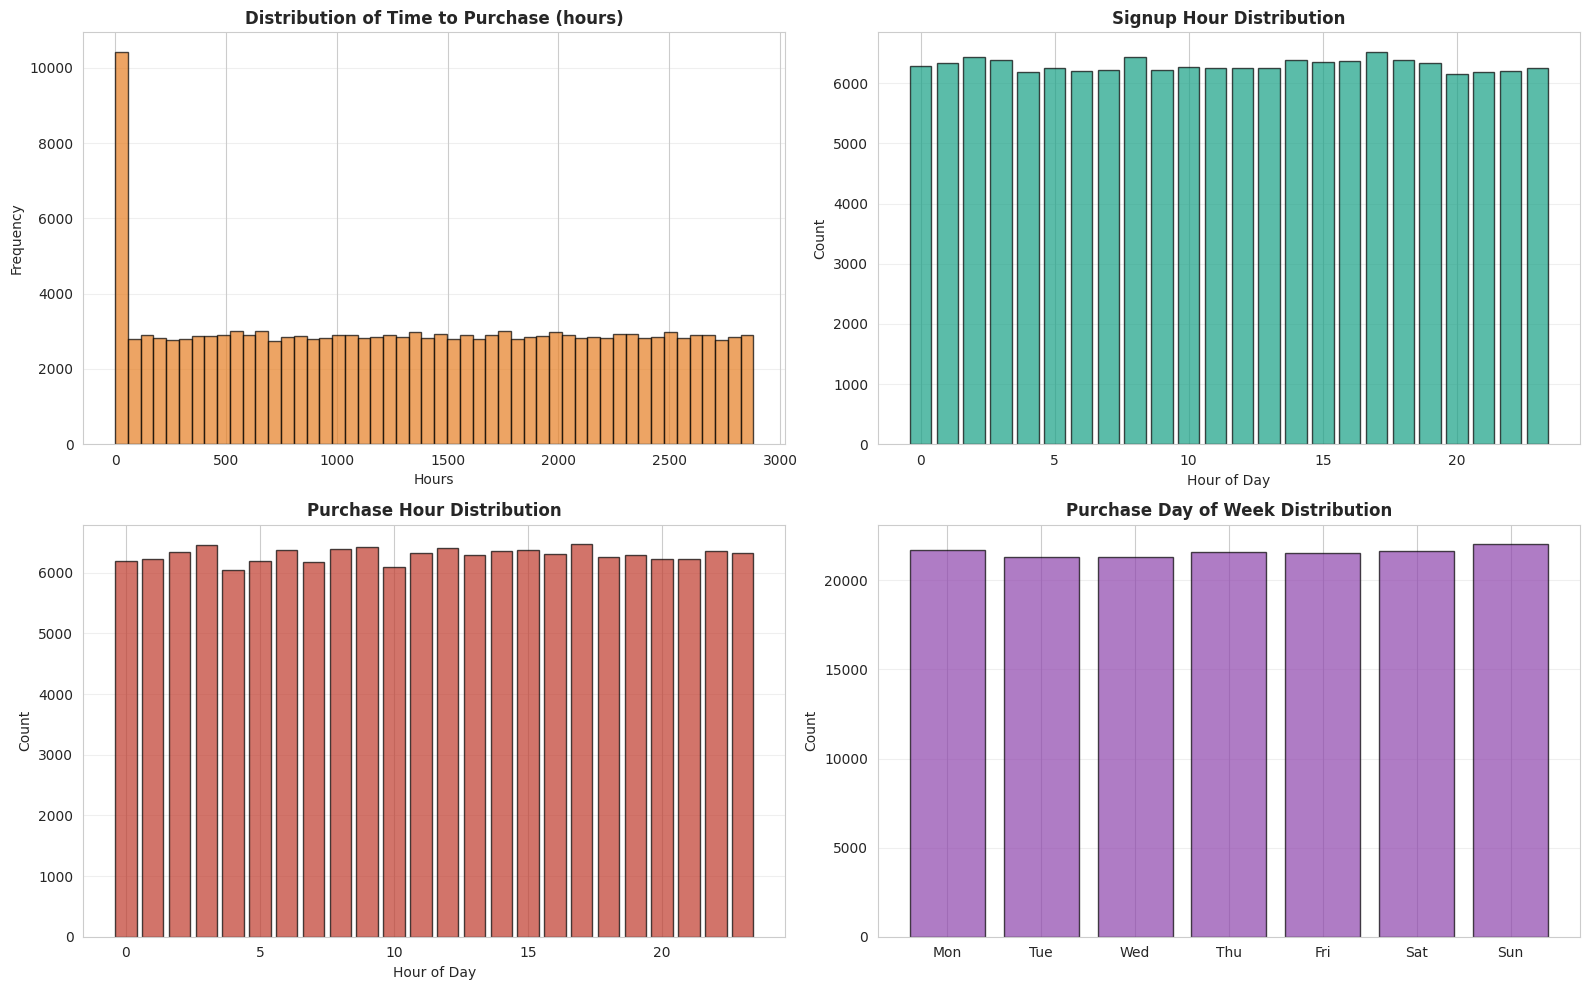


Time to Purchase Statistics:
count    151112.000000
mean       1370.008125
std         868.406422
min           0.000278
25%         607.431528
50%        1368.429306
75%        2123.479028
max        2879.992222
Name: time_to_purchase, dtype: float64


In [17]:
# Time-based features analysis
print("=" * 120)
print("UNIVARIATE ANALYSIS - TIME-BASED FEATURES")
print("=" * 120)

# Calculate time difference between signup and purchase
df['time_to_purchase'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600  # in hours

# Extract temporal features
df['signup_hour'] = df['signup_time'].dt.hour
df['signup_dayofweek'] = df['signup_time'].dt.dayofweek
df['purchase_hour'] = df['purchase_time'].dt.hour
df['purchase_dayofweek'] = df['purchase_time'].dt.dayofweek

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time to purchase distribution
axes[0, 0].hist(df['time_to_purchase'], bins=50, color='#e67e22', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Time to Purchase (hours)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Hours', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# Signup hour distribution
signup_hour_counts = df['signup_hour'].value_counts().sort_index()
axes[0, 1].bar(signup_hour_counts.index, signup_hour_counts.values, 
               color='#16a085', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Signup Hour Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Hour of Day', fontsize=10)
axes[0, 1].set_ylabel('Count', fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)

# Purchase hour distribution
purchase_hour_counts = df['purchase_hour'].value_counts().sort_index()
axes[1, 0].bar(purchase_hour_counts.index, purchase_hour_counts.values, 
               color='#c0392b', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Purchase Hour Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day', fontsize=10)
axes[1, 0].set_ylabel('Count', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3)

# Day of week distribution
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
purchase_dow_counts = df['purchase_dayofweek'].value_counts().sort_index()
axes[1, 1].bar(range(len(purchase_dow_counts)), purchase_dow_counts.values, 
               color='#8e44ad', alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(purchase_dow_counts)))
axes[1, 1].set_xticklabels([day_names[i] for i in purchase_dow_counts.index])
axes[1, 1].set_title('Purchase Day of Week Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTime to Purchase Statistics:")
print(df['time_to_purchase'].describe())


### 5.3 Bivariate Analysis - Relationships Between Features and Target


BIVARIATE ANALYSIS - NUMERICAL FEATURES vs TARGET


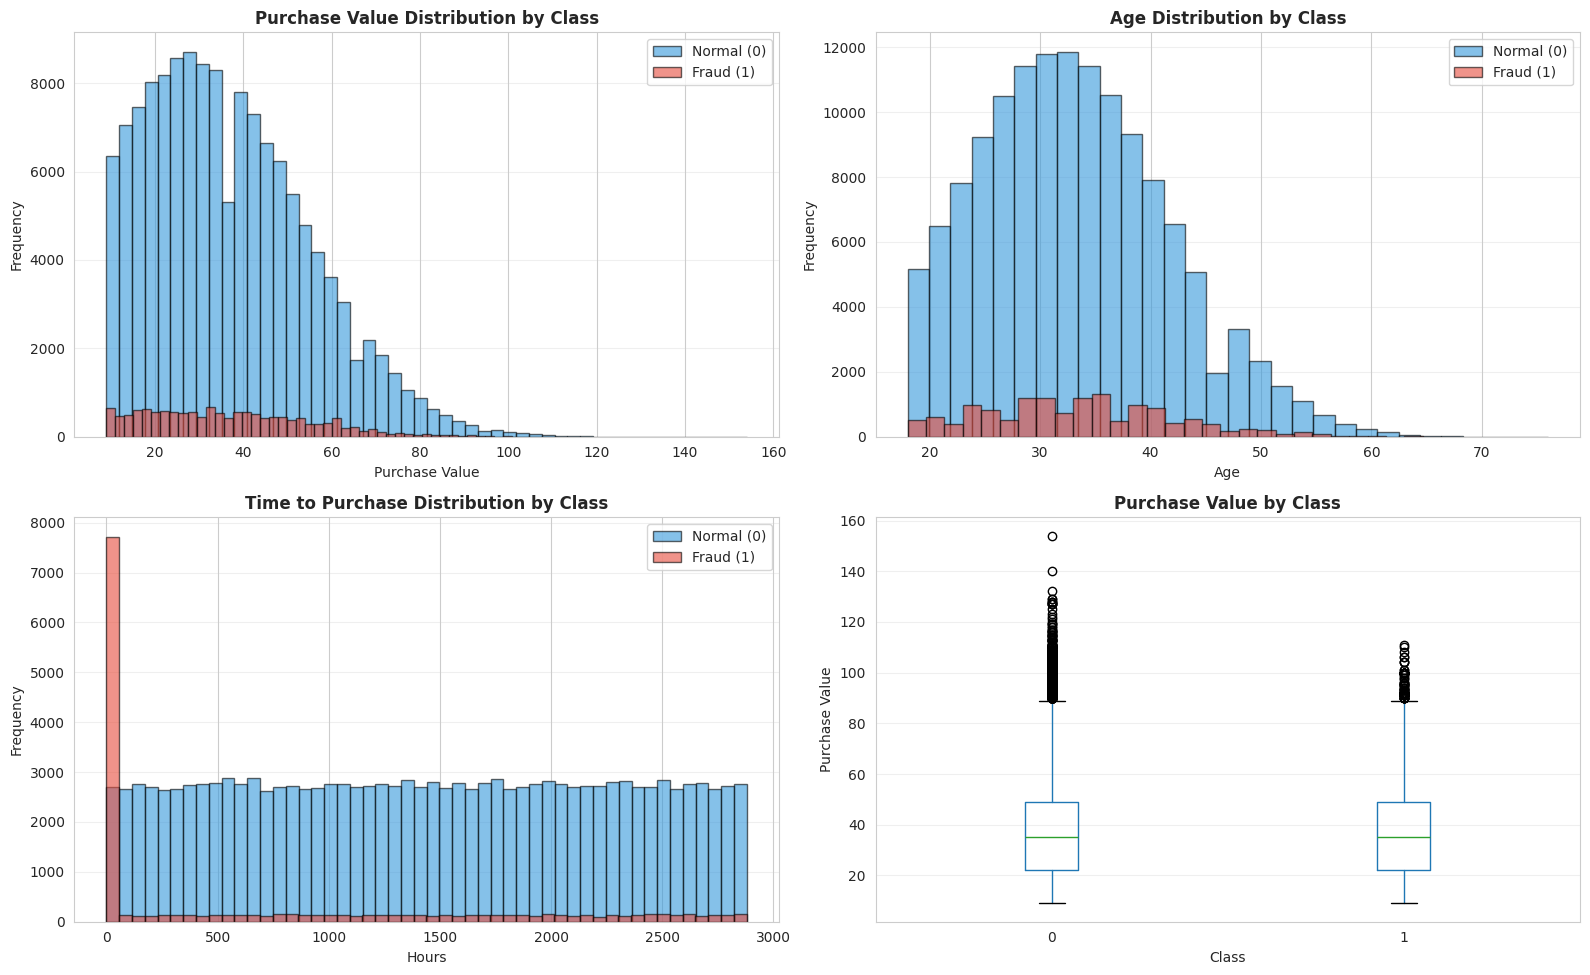


Statistical Comparison by Class:

Purchase Value:
          count       mean        std  min   25%   50%   75%    max
class                                                              
0      136961.0  36.929418  18.315064  9.0  22.0  35.0  49.0  154.0
1       14151.0  36.993004  18.397654  9.0  22.0  35.0  49.0  111.0

Age:
          count       mean       std   min   25%   50%   75%   max
class                                                             
0      136961.0  33.122356  8.622678  18.0  27.0  33.0  39.0  76.0
1       14151.0  33.318281  8.568001  18.0  27.0  33.0  39.0  68.0

Time to Purchase (hours):
          count         mean         std       min         25%          50%  \
class                                                                         
0      136961.0  1441.994052  830.163558  0.038056  719.119167  1443.030833   
1       14151.0   673.289542  920.496897  0.000278    0.000278     0.000278   

               75%          max  
class                    

In [18]:
# Numerical features vs Target
print("=" * 120)
print("BIVARIATE ANALYSIS - NUMERICAL FEATURES vs TARGET")
print("=" * 120)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Purchase Value by Class
fraud_purchase = df[df['class'] == 1]['purchase_value']
normal_purchase = df[df['class'] == 0]['purchase_value']

axes[0, 0].hist(normal_purchase, bins=50, alpha=0.6, label='Normal (0)', color='#3498db', edgecolor='black')
axes[0, 0].hist(fraud_purchase, bins=50, alpha=0.6, label='Fraud (1)', color='#e74c3c', edgecolor='black')
axes[0, 0].set_title('Purchase Value Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Purchase Value', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Age by Class
fraud_age = df[df['class'] == 1]['age']
normal_age = df[df['class'] == 0]['age']

axes[0, 1].hist(normal_age, bins=30, alpha=0.6, label='Normal (0)', color='#3498db', edgecolor='black')
axes[0, 1].hist(fraud_age, bins=30, alpha=0.6, label='Fraud (1)', color='#e74c3c', edgecolor='black')
axes[0, 1].set_title('Age Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Age', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Time to Purchase by Class
fraud_time = df[df['class'] == 1]['time_to_purchase']
normal_time = df[df['class'] == 0]['time_to_purchase']

axes[1, 0].hist(normal_time, bins=50, alpha=0.6, label='Normal (0)', color='#3498db', edgecolor='black')
axes[1, 0].hist(fraud_time, bins=50, alpha=0.6, label='Fraud (1)', color='#e74c3c', edgecolor='black')
axes[1, 0].set_title('Time to Purchase Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hours', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Box plot: Purchase Value by Class
df.boxplot(column='purchase_value', by='class', ax=axes[1, 1], grid=False)
axes[1, 1].set_title('Purchase Value by Class', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Class', fontsize=10)
axes[1, 1].set_ylabel('Purchase Value', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('', fontsize=1)  # Remove default title
plt.tight_layout()
plt.show()

# Statistical comparison
print("\nStatistical Comparison by Class:")
print("\nPurchase Value:")
print(df.groupby('class')['purchase_value'].describe())
print("\nAge:")
print(df.groupby('class')['age'].describe())
print("\nTime to Purchase (hours):")
print(df.groupby('class')['time_to_purchase'].describe())


BIVARIATE ANALYSIS - CATEGORICAL FEATURES vs TARGET


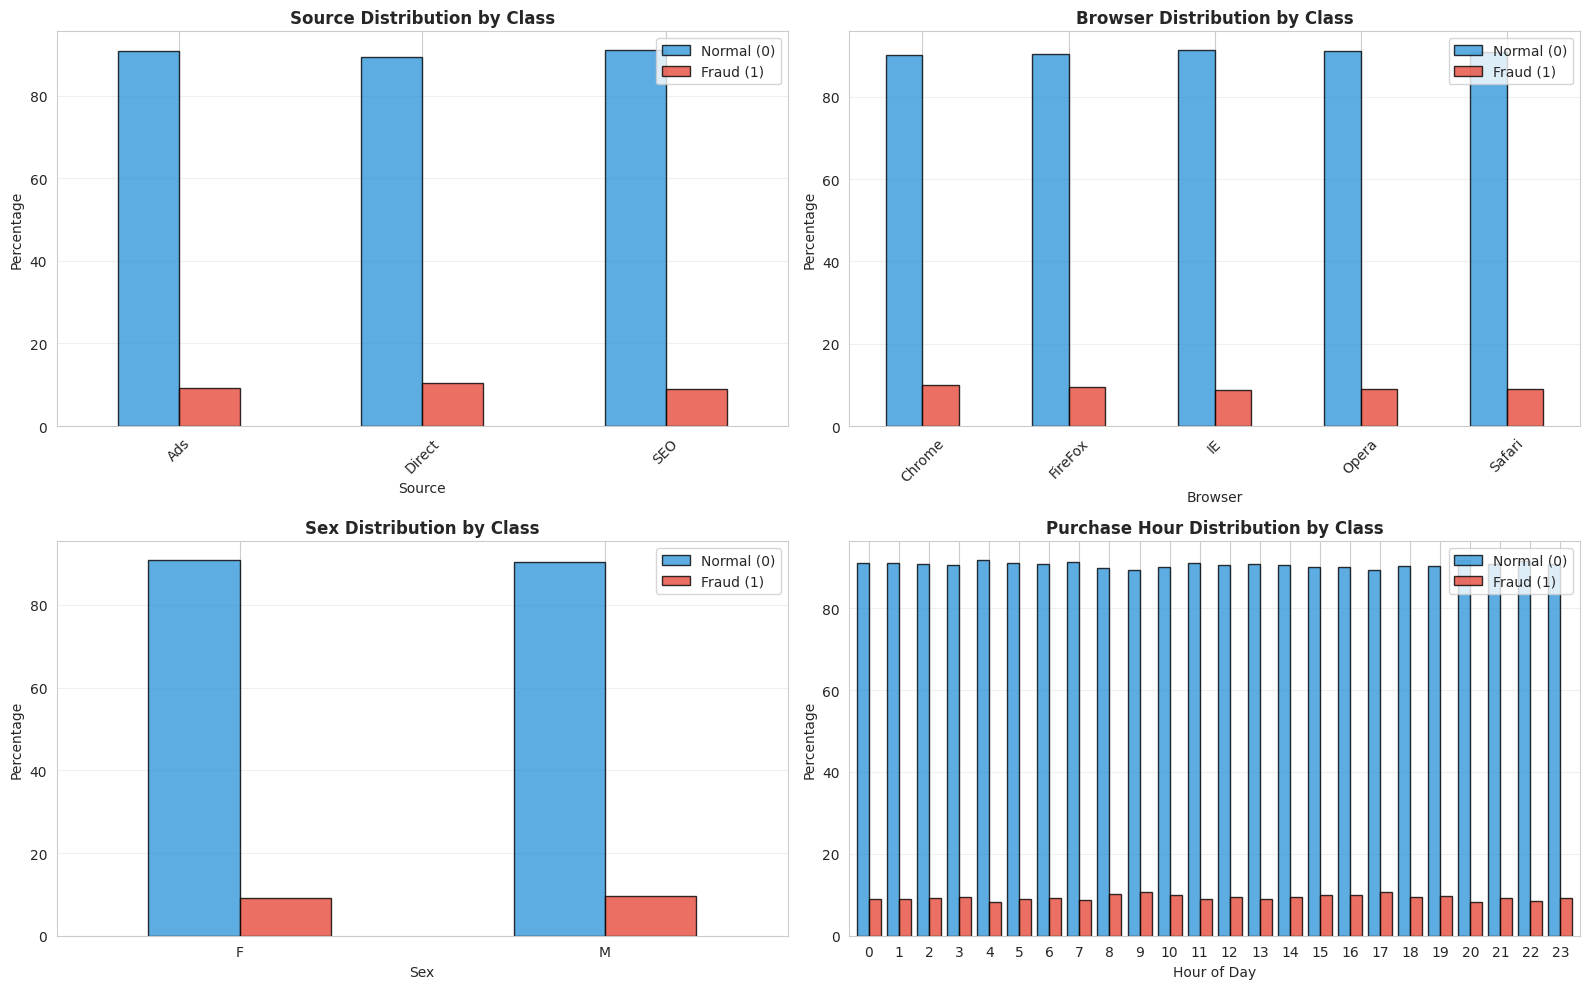


Source vs Class Crosstab:
class        0      1     All
source                       
Ads      54368   5513   59881
Direct   27390   3226   30616
SEO      55203   5412   60615
All     136961  14151  151112

Browser vs Class Crosstab:
class         0      1     All
browser                       
Chrome    55363   6069   61432
FireFox   22268   2342   24610
IE        33540   3187   36727
Opera      3348    328    3676
Safari    22442   2225   24667
All      136961  14151  151112

Sex vs Class Crosstab:
class       0      1     All
sex                         
F       57102   5717   62819
M       79859   8434   88293
All    136961  14151  151112


In [19]:
# Categorical features vs Target
print("=" * 120)
print("BIVARIATE ANALYSIS - CATEGORICAL FEATURES vs TARGET")
print("=" * 120)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Source vs Class
source_class = pd.crosstab(df['source'], df['class'], normalize='index') * 100
source_class.plot(kind='bar', ax=axes[0, 0], color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Source Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Source', fontsize=10)
axes[0, 0].set_ylabel('Percentage', fontsize=10)
axes[0, 0].legend(['Normal (0)', 'Fraud (1)'])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Browser vs Class
browser_class = pd.crosstab(df['browser'], df['class'], normalize='index') * 100
browser_class.plot(kind='bar', ax=axes[0, 1], color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Browser Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Browser', fontsize=10)
axes[0, 1].set_ylabel('Percentage', fontsize=10)
axes[0, 1].legend(['Normal (0)', 'Fraud (1)'])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Sex vs Class
sex_class = pd.crosstab(df['sex'], df['class'], normalize='index') * 100
sex_class.plot(kind='bar', ax=axes[1, 0], color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Sex Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sex', fontsize=10)
axes[1, 0].set_ylabel('Percentage', fontsize=10)
axes[1, 0].legend(['Normal (0)', 'Fraud (1)'])
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y', alpha=0.3)

# Purchase Hour vs Class
purchase_hour_class = pd.crosstab(df['purchase_hour'], df['class'], normalize='index') * 100
purchase_hour_class.plot(kind='bar', ax=axes[1, 1], color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black', width=0.8)
axes[1, 1].set_title('Purchase Hour Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day', fontsize=10)
axes[1, 1].set_ylabel('Percentage', fontsize=10)
axes[1, 1].legend(['Normal (0)', 'Fraud (1)'])
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print crosstabs
print("\nSource vs Class Crosstab:")
print(pd.crosstab(df['source'], df['class'], margins=True))
print("\nBrowser vs Class Crosstab:")
print(pd.crosstab(df['browser'], df['class'], margins=True))
print("\nSex vs Class Crosstab:")
print(pd.crosstab(df['sex'], df['class'], margins=True))


CORRELATION ANALYSIS


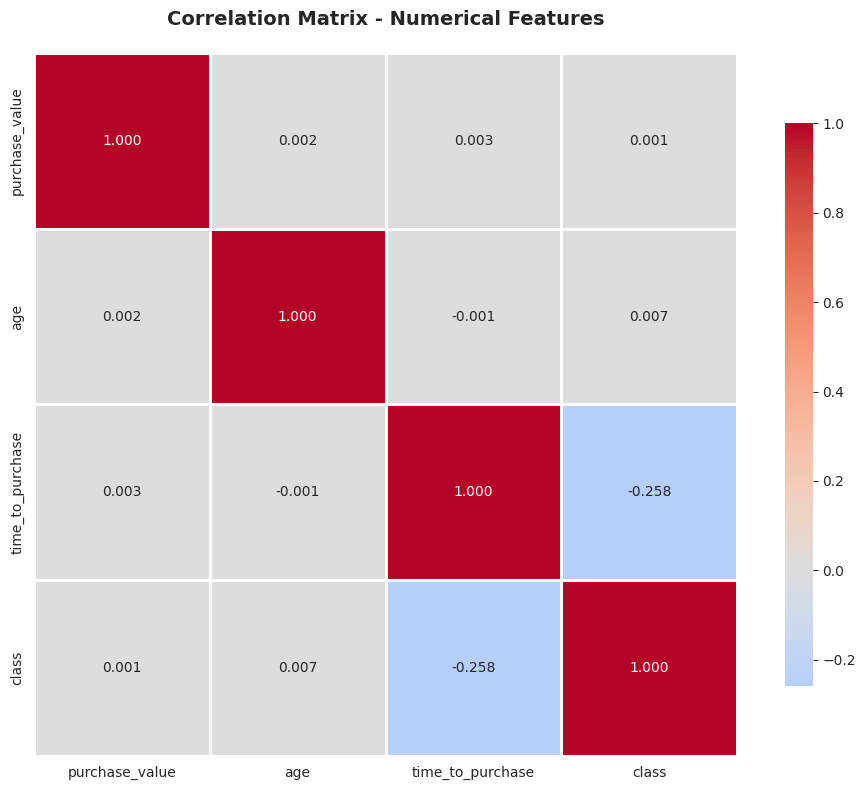


Correlation with Target (Class):
  age: 0.0066
  purchase_value: 0.0010
  time_to_purchase: -0.2579


In [20]:
# Correlation analysis
print("=" * 120)
print("CORRELATION ANALYSIS")
print("=" * 120)

# Select numerical features for correlation
numerical_features = ['purchase_value', 'age', 'time_to_purchase', 'class']
correlation_matrix = df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (Class):")
correlations = correlation_matrix['class'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'class':
        print(f"  {feature}: {corr:.4f}")


### 5.4 Key Insights and Summary


In [21]:
print("=" * 120)
print("EDA KEY INSIGHTS SUMMARY")
print("=" * 120)

print("\n1. CLASS DISTRIBUTION:")
print(f"   - Imbalance Ratio: {imbalance_ratio:.2f}:1 (Normal:Fraud)")
print(f"   - Fraud represents {class_percentages.get(1, 0):.2f}% of all transactions")
print(f"   - Action Required: {'Yes - Use sampling/class weights' if imbalance_ratio > 5 else 'Moderate - Consider class weights'}")

print("\n2. NUMERICAL FEATURES:")
print(f"   - Purchase Value: Mean={df['purchase_value'].mean():.2f}, Median={df['purchase_value'].median():.2f}")
print(f"   - Age: Mean={df['age'].mean():.2f}, Median={df['age'].median():.2f}")
print(f"   - Time to Purchase: Mean={df['time_to_purchase'].mean():.2f} hours, Median={df['time_to_purchase'].median():.2f} hours")

print("\n3. CATEGORICAL FEATURES:")
print(f"   - Most common Source: {df['source'].mode()[0]}")
print(f"   - Most common Browser: {df['browser'].mode()[0]}")
print(f"   - Sex Distribution: {df['sex'].value_counts().to_dict()}")

print("\n4. FRAUD PATTERNS:")
fraud_df = df[df['class'] == 1]
normal_df = df[df['class'] == 0]

print(f"   - Average Purchase Value (Fraud): {fraud_df['purchase_value'].mean():.2f}")
print(f"   - Average Purchase Value (Normal): {normal_df['purchase_value'].mean():.2f}")
print(f"   - Average Age (Fraud): {fraud_df['age'].mean():.2f}")
print(f"   - Average Age (Normal): {normal_df['age'].mean():.2f}")
print(f"   - Average Time to Purchase (Fraud): {fraud_df['time_to_purchase'].mean():.2f} hours")
print(f"   - Average Time to Purchase (Normal): {normal_df['time_to_purchase'].mean():.2f} hours")

print("\n5. RECOMMENDATIONS FOR FEATURE ENGINEERING:")
print("   - Create time-based features (hour, day of week, time differences)")
print("   - Encode categorical variables (one-hot or target encoding)")
print("   - Handle class imbalance (SMOTE, undersampling, or class weights)")
print("   - Consider feature interactions (e.g., purchase_value * time_to_purchase)")
print("   - Normalize/scale numerical features for ML models")

print("\n✓ EDA Complete! Ready for feature engineering.")


EDA KEY INSIGHTS SUMMARY

1. CLASS DISTRIBUTION:
   - Imbalance Ratio: 9.68:1 (Normal:Fraud)
   - Fraud represents 9.36% of all transactions
   - Action Required: Yes - Use sampling/class weights

2. NUMERICAL FEATURES:
   - Purchase Value: Mean=36.94, Median=35.00
   - Age: Mean=33.14, Median=33.00
   - Time to Purchase: Mean=1370.01 hours, Median=1368.43 hours

3. CATEGORICAL FEATURES:
   - Most common Source: SEO
   - Most common Browser: Chrome
   - Sex Distribution: {'M': 88293, 'F': 62819}

4. FRAUD PATTERNS:
   - Average Purchase Value (Fraud): 36.99
   - Average Purchase Value (Normal): 36.93
   - Average Age (Fraud): 33.32
   - Average Age (Normal): 33.12
   - Average Time to Purchase (Fraud): 673.29 hours
   - Average Time to Purchase (Normal): 1441.99 hours

5. RECOMMENDATIONS FOR FEATURE ENGINEERING:
   - Create time-based features (hour, day of week, time differences)
   - Encode categorical variables (one-hot or target encoding)
   - Handle class imbalance (SMOTE, undersa

## 6. Geolocation Integration

### 6.1 Convert IP Addresses to Integer Format


In [22]:
# Load IP address mapping file
print("=" * 120)
print("GEOLOCATION INTEGRATION")
print("=" * 120)

ip_mapping_path = data_dir / 'raw' / 'IpAddress_to_Country.csv'
print(f"\nLoading IP address to country mapping...")
ip_mapping = pd.read_csv(ip_mapping_path)

print(f"IP Mapping file loaded: {ip_mapping.shape[0]:,} country ranges")
print(f"\nFirst few rows:")
print(ip_mapping.head())

print(f"\nIP Mapping columns: {ip_mapping.columns.tolist()}")
print(f"\nSample countries: {ip_mapping['country'].value_counts().head(10)}")


GEOLOCATION INTEGRATION

Loading IP address to country mapping...
IP Mapping file loaded: 138,846 country ranges

First few rows:
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

IP Mapping columns: ['lower_bound_ip_address', 'upper_bound_ip_address', 'country']

Sample countries: country
United States         46868
Canada                 6989
Russian Federation     6739
Australia              6316
Germany                5999
United Kingdom         5401
Brazil                 4885
China                  3725
Poland                 3042
Japan                  3005
Name: count, dtype: int64


In [23]:
# Ensure we have the cleaned dataframe
if 'df' not in locals() or df is None:
    cleaned_file_path = processed_data_path / 'fraud_data_cleaned.csv'
    df = pd.read_csv(cleaned_file_path)
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])

print("\n" + "=" * 120)
print("CONVERT IP ADDRESSES TO INTEGER FORMAT")
print("=" * 120)

# Check current IP address format
print(f"\nCurrent IP address data type: {df['ip_address'].dtype}")
print(f"Sample IP addresses:")
print(df[['ip_address']].head(10))

# Convert IP address to integer (it's already numeric, but ensure it's int64)
df['ip_address_int'] = df['ip_address'].astype('int64')

print(f"\n✓ IP addresses converted to integer format")
print(f"IP address integer range: {df['ip_address_int'].min():,} to {df['ip_address_int'].max():,}")
print(f"\nSample converted IP addresses:")
print(df[['ip_address', 'ip_address_int']].head(10))



CONVERT IP ADDRESSES TO INTEGER FORMAT

Current IP address data type: float64
Sample IP addresses:
     ip_address
0  7.327584e+08
1  3.503114e+08
2  2.621474e+09
3  3.840542e+09
4  4.155831e+08
5  2.809315e+09
6  3.987484e+09
7  1.692459e+09
8  3.719094e+09
9  3.416747e+08

✓ IP addresses converted to integer format
IP address integer range: 52,093 to 4,294,850,499

Sample converted IP addresses:
     ip_address  ip_address_int
0  7.327584e+08       732758368
1  3.503114e+08       350311387
2  2.621474e+09      2621473820
3  3.840542e+09      3840542443
4  4.155831e+08       415583117
5  2.809315e+09      2809315199
6  3.987484e+09      3987484328
7  1.692459e+09      1692458727
8  3.719094e+09      3719094257
9  3.416747e+08       341674739


### 6.2 Merge with IP Address to Country Mapping (Range-Based Lookup)


In [24]:
# Range-based lookup function
def find_country_by_ip(ip_int, ip_mapping_df):
    """
    Find country for an IP address using range-based lookup.
    Returns country name if found, 'Unknown' otherwise.
    """
    # Find where IP falls within the range
    matching = ip_mapping_df[
        (ip_mapping_df['lower_bound_ip_address'] <= ip_int) & 
        (ip_mapping_df['upper_bound_ip_address'] >= ip_int)
    ]
    
    if len(matching) > 0:
        # If multiple matches, take the first one (shouldn't happen with proper ranges)
        return matching.iloc[0]['country']
    else:
        return 'Unknown'

print("=" * 120)
print("MERGE WITH IP ADDRESS TO COUNTRY MAPPING")
print("=" * 120)

print(f"\nPerforming range-based lookup for {len(df):,} IP addresses...")
print("This may take a few minutes...")

# Apply the lookup function
# For better performance, we'll use a vectorized approach with merge_asof
# First, convert IP mapping columns to int64 to match ip_address_int dtype
print("Converting IP mapping columns to int64...")
ip_mapping['lower_bound_ip_address'] = ip_mapping['lower_bound_ip_address'].astype('int64')
ip_mapping['upper_bound_ip_address'] = ip_mapping['upper_bound_ip_address'].astype('int64')
print("✓ IP mapping columns converted to int64")

# Sort both dataframes
ip_mapping_sorted = ip_mapping.sort_values('lower_bound_ip_address').reset_index(drop=True)
df_sorted = df.sort_values('ip_address_int').reset_index(drop=True)

# Use merge_asof for efficient range-based lookup
# This is much faster than applying a function row by row
df_with_country = pd.merge_asof(
    df_sorted[['ip_address_int']],
    ip_mapping_sorted[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_address_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter to ensure IP is within the range
df_with_country = df_with_country[
    (df_with_country['ip_address_int'] >= df_with_country['lower_bound_ip_address']) &
    (df_with_country['ip_address_int'] <= df_with_country['upper_bound_ip_address'])
]

# Merge back with original dataframe
df_sorted = df_sorted.reset_index(drop=True)
df_sorted['country'] = df_with_country['country'].fillna('Unknown')

# Restore original order
df = df_sorted.sort_index()

print(f"\n✓ Country mapping completed!")
print(f"Countries found: {df['country'].value_counts().shape[0]}")
print(f"Unknown IPs: {(df['country'] == 'Unknown').sum()}")


MERGE WITH IP ADDRESS TO COUNTRY MAPPING

Performing range-based lookup for 151,112 IP addresses...
This may take a few minutes...
Converting IP mapping columns to int64...
✓ IP mapping columns converted to int64

✓ Country mapping completed!
Countries found: 181
Unknown IPs: 0


In [25]:
# Alternative method: Using apply (slower but more reliable for edge cases)
# Uncomment if merge_asof doesn't work correctly

# print("\nUsing apply method for range-based lookup...")
# tqdm.pandas(desc="Mapping IPs to countries")
# df['country'] = df['ip_address_int'].progress_apply(
#     lambda x: find_country_by_ip(x, ip_mapping)
# )

# Show sample results
print("\nSample IP to Country mappings:")
sample_df = df[['ip_address', 'ip_address_int', 'country', 'class']].head(20)
print(sample_df)

# Check country distribution
print("\n" + "=" * 120)
print("COUNTRY DISTRIBUTION")
print("=" * 120)
country_counts = df['country'].value_counts()
print(f"\nTop 20 Countries by Transaction Count:")
print(country_counts.head(20))



Sample IP to Country mappings:
       ip_address  ip_address_int country  class
0    52093.496895           52093     NaN      0
1    93447.138961           93447     NaN      0
2   105818.501505          105818     NaN      0
3   117566.664867          117566     NaN      0
4   131423.789042          131423     NaN      0
5   155130.397004          155130     NaN      0
6   155399.107925          155399     NaN      0
7   159119.791297          159119     NaN      0
8   166326.775242          166326     NaN      0
9   207999.643852          207999     NaN      0
10  211429.420992          211429     NaN      0
11  306355.930959          306355     NaN      0
12  346413.877790          346413     NaN      0
13  370939.954453          370939     NaN      0
14  371186.766938          371186     NaN      0
15  428936.880683          428936     NaN      0
16  504221.411352          504221     NaN      0
17  507955.700192          507955     NaN      0
18  541418.870073          541418    

### 6.3 Analyze Fraud Patterns by Country


In [26]:
print("=" * 120)
print("FRAUD PATTERNS BY COUNTRY")
print("=" * 120)

# Calculate fraud statistics by country
country_fraud_stats = df.groupby('country').agg({
    'class': ['count', 'sum', 'mean']
}).reset_index()

country_fraud_stats.columns = ['country', 'total_transactions', 'fraud_count', 'fraud_rate']
country_fraud_stats['fraud_rate'] = country_fraud_stats['fraud_rate'] * 100
country_fraud_stats = country_fraud_stats.sort_values('fraud_rate', ascending=False)

print("\nFraud Statistics by Country:")
print("=" * 100)
print(f"{'Country':<25} {'Total':<12} {'Fraud':<12} {'Fraud Rate':<12}")
print("-" * 100)
for _, row in country_fraud_stats.head(30).iterrows():
    print(f"{row['country']:<25} {row['total_transactions']:<12,} {row['fraud_count']:<12,} {row['fraud_rate']:<12.2f}%")

# Filter countries with significant transaction volume (at least 100 transactions)
significant_countries = country_fraud_stats[country_fraud_stats['total_transactions'] >= 100]
print(f"\n\nCountries with ≥100 transactions:")
print(f"Total countries: {len(significant_countries)}")
print(f"\nTop 20 Countries by Fraud Rate (min 100 transactions):")
print(significant_countries.head(20))


FRAUD PATTERNS BY COUNTRY

Fraud Statistics by Country:
Country                   Total        Fraud        Fraud Rate  
----------------------------------------------------------------------------------------------------
Turkmenistan              1            1            100.00      %
Namibia                   23           10           43.48       %
Sri Lanka                 31           13           41.94       %
Luxembourg                72           28           38.89       %
Virgin Islands (U.S.)     3            1            33.33       %
Ecuador                   106          28           26.42       %
Tunisia                   118          31           26.27       %
Peru                      119          31           26.05       %
Bolivia                   53           13           24.53       %
Kuwait                    90           21           23.33       %
Ireland                   240          55           22.92       %
New Zealand               278          62           

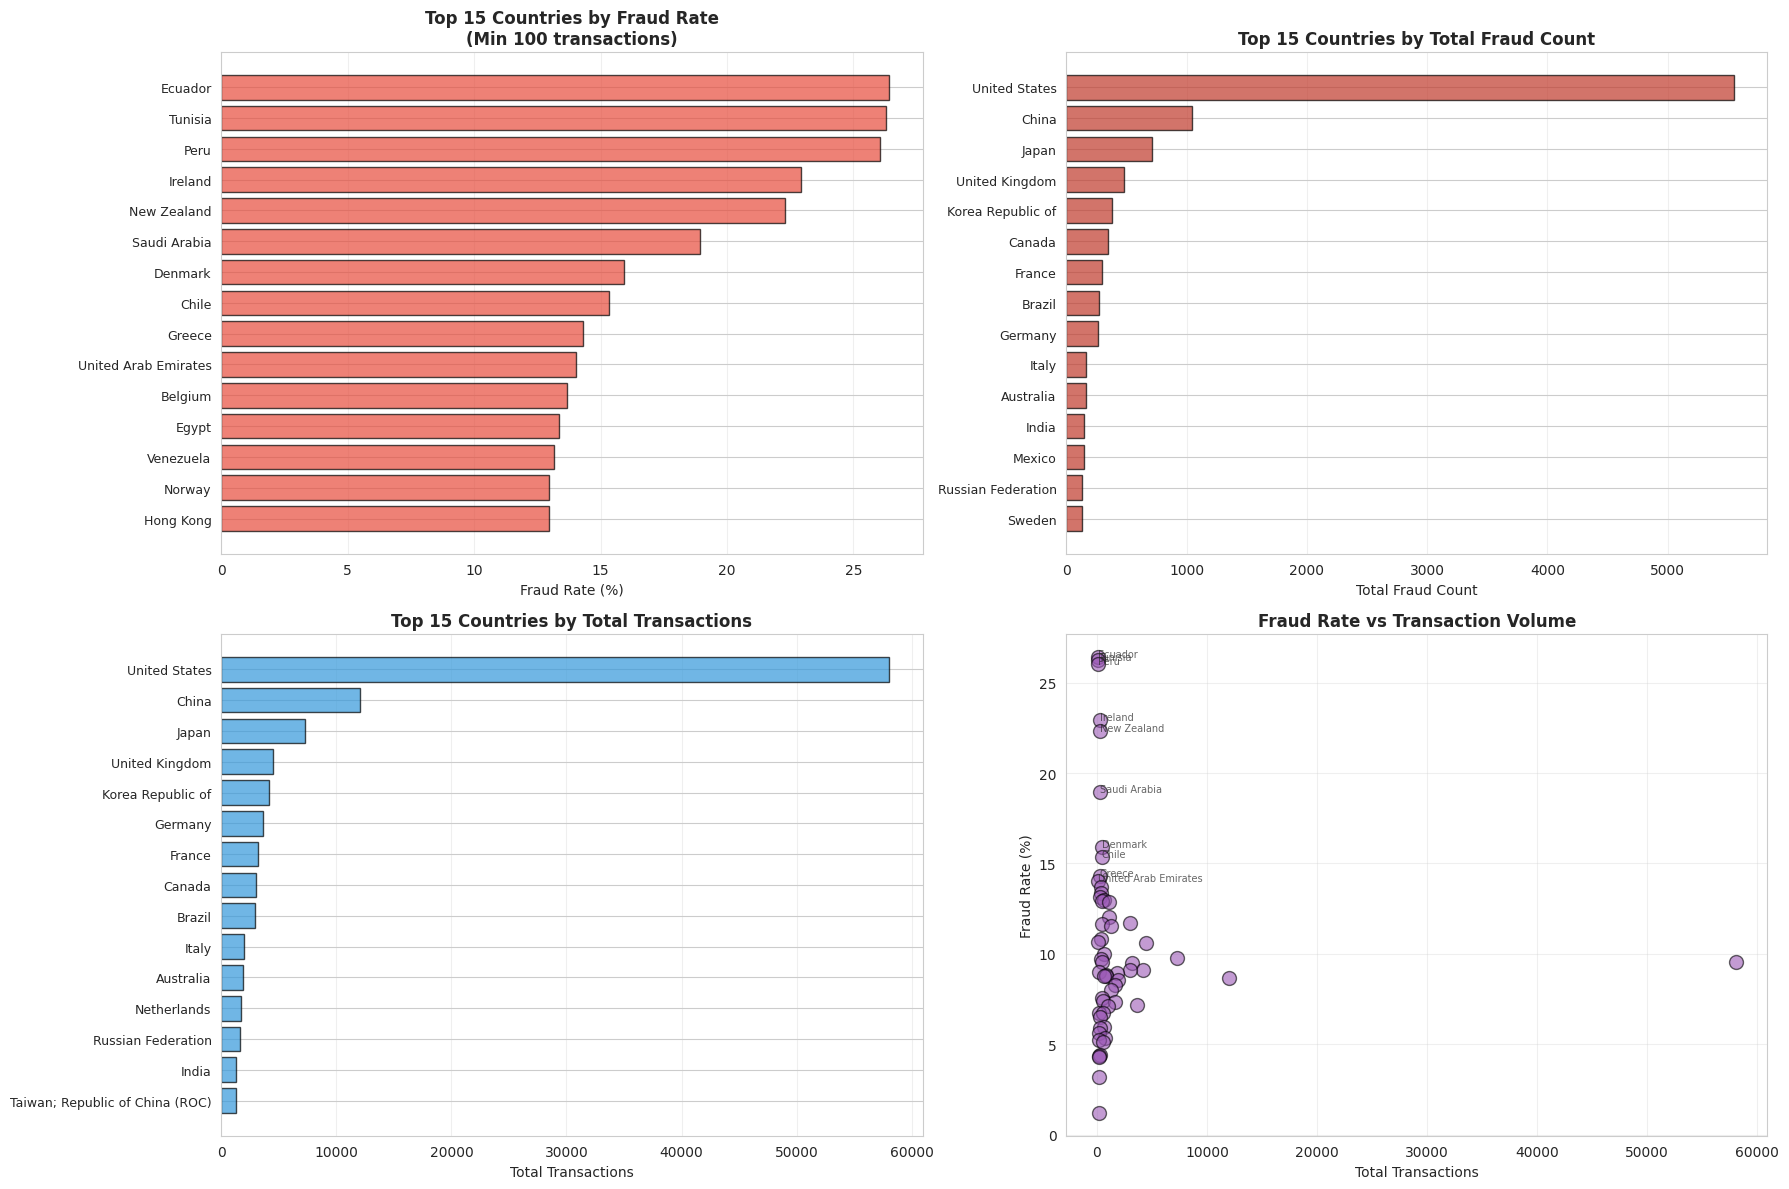

In [27]:
# Visualize fraud patterns by country
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top 15 countries by fraud rate (with min 100 transactions)
top_fraud_rate = significant_countries.head(15)
axes[0, 0].barh(range(len(top_fraud_rate)), top_fraud_rate['fraud_rate'], 
                color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 0].set_yticks(range(len(top_fraud_rate)))
axes[0, 0].set_yticklabels(top_fraud_rate['country'], fontsize=9)
axes[0, 0].set_xlabel('Fraud Rate (%)', fontsize=10)
axes[0, 0].set_title('Top 15 Countries by Fraud Rate\n(Min 100 transactions)', 
                     fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].invert_yaxis()

# Top 15 countries by total fraud count
top_fraud_count = country_fraud_stats.nlargest(15, 'fraud_count')
axes[0, 1].barh(range(len(top_fraud_count)), top_fraud_count['fraud_count'], 
                color='#c0392b', alpha=0.7, edgecolor='black')
axes[0, 1].set_yticks(range(len(top_fraud_count)))
axes[0, 1].set_yticklabels(top_fraud_count['country'], fontsize=9)
axes[0, 1].set_xlabel('Total Fraud Count', fontsize=10)
axes[0, 1].set_title('Top 15 Countries by Total Fraud Count', 
                     fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# Top 15 countries by total transactions
top_transactions = country_fraud_stats.nlargest(15, 'total_transactions')
axes[1, 0].barh(range(len(top_transactions)), top_transactions['total_transactions'], 
                color='#3498db', alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(len(top_transactions)))
axes[1, 0].set_yticklabels(top_transactions['country'], fontsize=9)
axes[1, 0].set_xlabel('Total Transactions', fontsize=10)
axes[1, 0].set_title('Top 15 Countries by Total Transactions', 
                     fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Fraud rate vs Transaction volume scatter
axes[1, 1].scatter(significant_countries['total_transactions'], 
                   significant_countries['fraud_rate'],
                   s=100, alpha=0.6, color='#9b59b6', edgecolor='black')
axes[1, 1].set_xlabel('Total Transactions', fontsize=10)
axes[1, 1].set_ylabel('Fraud Rate (%)', fontsize=10)
axes[1, 1].set_title('Fraud Rate vs Transaction Volume', 
                     fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
# Add labels for top fraud rate countries
for idx, row in significant_countries.head(10).iterrows():
    axes[1, 1].annotate(row['country'], 
                       (row['total_transactions'], row['fraud_rate']),
                       fontsize=7, alpha=0.7)

plt.tight_layout()
plt.show()


In [30]:
# Country-level fraud analysis with statistical significance
print("\n" + "=" * 120)
print("DETAILED COUNTRY FRAUD ANALYSIS")
print("=" * 120)

# Calculate overall fraud rate for comparison
overall_fraud_rate = df['class'].mean() * 100
print(f"\nOverall Fraud Rate: {overall_fraud_rate:.2f}%")

# Identify high-risk countries (fraud rate > 2x overall rate)_check_dtype_match
high_risk_threshold = overall_fraud_rate * 2
high_risk_countries = significant_countries[
    significant_countries['fraud_rate'] > high_risk_threshold
].sort_values('fraud_rate', ascending=False)

print(f"\nHigh-Risk Countries (Fraud Rate > {high_risk_threshold:.2f}%):")
print(f"Number of high-risk countries: {len(high_risk_countries)}")
if len(high_risk_countries) > 0:
    print("\n" + "-" * 100)
    print(f"{'Country':<25} {'Total':<12} {'Fraud':<12} {'Fraud Rate':<12} {'Risk Level':<15}")
    print("-" * 100)
    for _, row in high_risk_countries.iterrows():
        risk_multiplier = row['fraud_rate'] / overall_fraud_rate
        risk_level = "CRITICAL" if risk_multiplier > 3 else "HIGH"
        print(f"{row['country']:<25} {row['total_transactions']:<12,} "
              f"{row['fraud_count']:<12,} {row['fraud_rate']:<12.2f}% "
              f"{risk_level:<15} ({risk_multiplier:.1f}x)")

# Identify low-risk countries
low_risk_threshold = overall_fraud_rate * 0.5
low_risk_countries = significant_countries[
    significant_countries['fraud_rate'] < low_risk_threshold
].sort_values('fraud_rate', ascending=True)

print(f"\n\nLow-Risk Countries (Fraud Rate < {low_risk_threshold:.2f}%):")
print(f"Number of low-risk countries: {len(low_risk_countries)}")
if len(low_risk_countries) > 0:
    print("\nTop 10 Low-Risk Countries:")
    print(low_risk_countries.head(10)[['country', 'total_transactions', 'fraud_count', 'fraud_rate']])



DETAILED COUNTRY FRAUD ANALYSIS

Overall Fraud Rate: 9.36%

High-Risk Countries (Fraud Rate > 18.73%):
Number of high-risk countries: 6

----------------------------------------------------------------------------------------------------
Country                   Total        Fraud        Fraud Rate   Risk Level     
----------------------------------------------------------------------------------------------------
Ecuador                   106          28           26.42       % HIGH            (2.8x)
Tunisia                   118          31           26.27       % HIGH            (2.8x)
Peru                      119          31           26.05       % HIGH            (2.8x)
Ireland                   240          55           22.92       % HIGH            (2.4x)
New Zealand               278          62           22.30       % HIGH            (2.4x)
Saudi Arabia              264          50           18.94       % HIGH            (2.0x)


Low-Risk Countries (Fraud Rate < 4.68%):
Nu

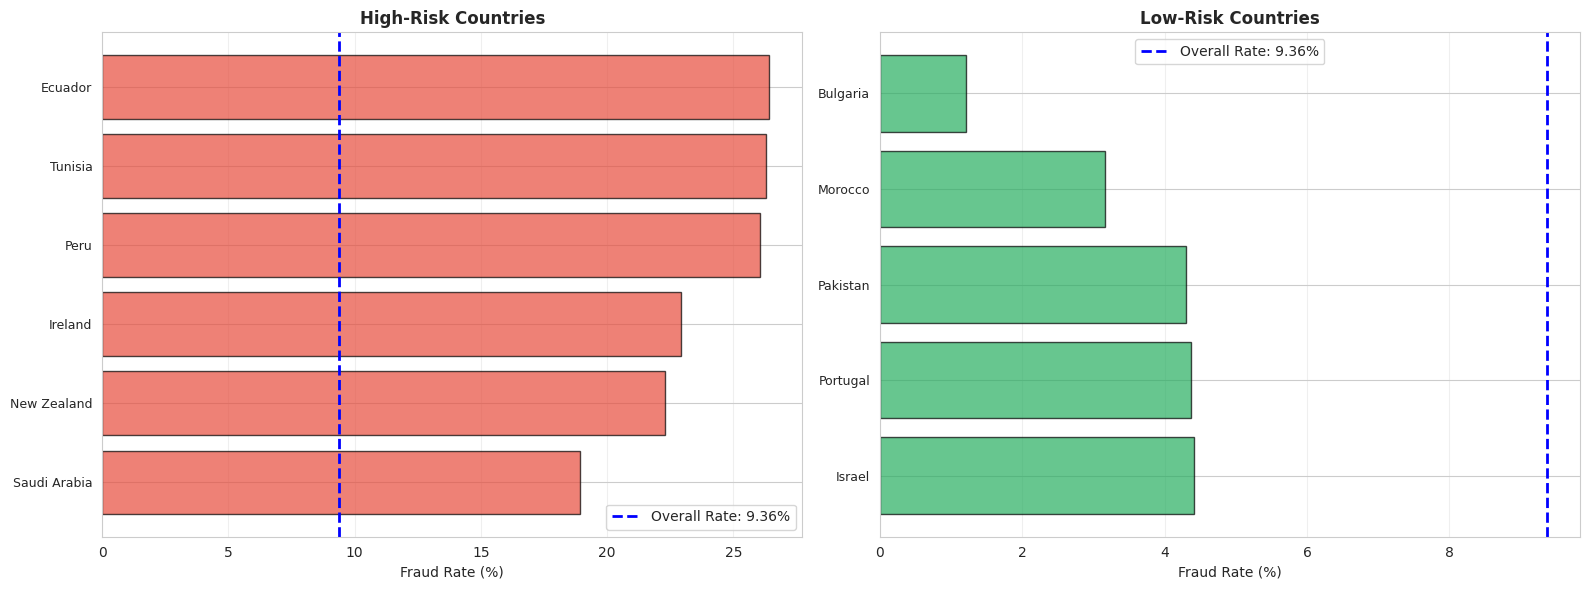

In [31]:
# Visualize country fraud risk levels
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# High-risk countries
if len(high_risk_countries) > 0:
    top_high_risk = high_risk_countries.head(15)
    colors_high = ['#c0392b' if x > overall_fraud_rate * 3 else '#e74c3c' 
                   for x in top_high_risk['fraud_rate']]
    axes[0].barh(range(len(top_high_risk)), top_high_risk['fraud_rate'], 
                 color=colors_high, alpha=0.7, edgecolor='black')
    axes[0].axvline(overall_fraud_rate, color='blue', linestyle='--', 
                    linewidth=2, label=f'Overall Rate: {overall_fraud_rate:.2f}%')
    axes[0].set_yticks(range(len(top_high_risk)))
    axes[0].set_yticklabels(top_high_risk['country'], fontsize=9)
    axes[0].set_xlabel('Fraud Rate (%)', fontsize=10)
    axes[0].set_title('High-Risk Countries', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()
else:
    axes[0].text(0.5, 0.5, 'No high-risk countries found', 
                 ha='center', va='center', fontsize=12)
    axes[0].set_title('High-Risk Countries', fontsize=12, fontweight='bold')

# Low-risk countries
if len(low_risk_countries) > 0:
    top_low_risk = low_risk_countries.head(15)
    axes[1].barh(range(len(top_low_risk)), top_low_risk['fraud_rate'], 
                 color='#27ae60', alpha=0.7, edgecolor='black')
    axes[1].axvline(overall_fraud_rate, color='blue', linestyle='--', 
                    linewidth=2, label=f'Overall Rate: {overall_fraud_rate:.2f}%')
    axes[1].set_yticks(range(len(top_low_risk)))
    axes[1].set_yticklabels(top_low_risk['country'], fontsize=9)
    axes[1].set_xlabel('Fraud Rate (%)', fontsize=10)
    axes[1].set_title('Low-Risk Countries', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()
else:
    axes[1].text(0.5, 0.5, 'No low-risk countries found', 
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Low-Risk Countries', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


### 6.4 Save Enhanced Dataset with Country Information


In [32]:
# Save enhanced dataset with country information
enhanced_file_path = processed_data_path / 'fraud_data_with_country.csv'
df.to_csv(enhanced_file_path, index=False)
print(f"✓ Enhanced dataset with country information saved to: {enhanced_file_path}")
print(f"  Shape: {df.shape}")
print(f"  New columns: country, ip_address_int")
print(f"  File size: {enhanced_file_path.stat().st_size / (1024*1024):.2f} MB")

# Summary
print("\n" + "=" * 120)
print("GEOLOCATION INTEGRATION SUMMARY")
print("=" * 120)
print(f"\n✓ IP addresses converted to integer format")
print(f"✓ Merged with IP address to country mapping ({len(ip_mapping):,} ranges)")
print(f"✓ Countries identified: {df['country'].nunique()}")
print(f"✓ Unknown IPs: {(df['country'] == 'Unknown').sum():,} ({(df['country'] == 'Unknown').sum()/len(df)*100:.2f}%)")
print(f"✓ High-risk countries identified: {len(high_risk_countries)}")
print(f"✓ Low-risk countries identified: {len(low_risk_countries)}")
print(f"\n✓ Dataset ready for feature engineering with country features!")


✓ Enhanced dataset with country information saved to: ../data/processed/fraud_data_with_country.csv
  Shape: (151112, 18)
  New columns: country, ip_address_int
  File size: 21.04 MB

GEOLOCATION INTEGRATION SUMMARY

✓ IP addresses converted to integer format
✓ Merged with IP address to country mapping (138,846 ranges)
✓ Countries identified: 181
✓ Unknown IPs: 0 (0.00%)
✓ High-risk countries identified: 6
✓ Low-risk countries identified: 5

✓ Dataset ready for feature engineering with country features!


## 7. Feature Engineering

### 7.1 Time-Based Features


In [33]:
# Ensure we have the enhanced dataframe with country
if 'df' not in locals() or df is None:
    enhanced_file_path = processed_data_path / 'fraud_data_with_country.csv'
    if enhanced_file_path.exists():
        df = pd.read_csv(enhanced_file_path)
        df['signup_time'] = pd.to_datetime(df['signup_time'])
        df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    else:
        # Fallback to cleaned data
        cleaned_file_path = processed_data_path / 'fraud_data_cleaned.csv'
        df = pd.read_csv(cleaned_file_path)
        df['signup_time'] = pd.to_datetime(df['signup_time'])
        df['purchase_time'] = pd.to_datetime(df['purchase_time'])

print("=" * 120)
print("FEATURE ENGINEERING - TIME-BASED FEATURES")
print("=" * 120)

# Extract hour of day from purchase_time
df['hour_of_day'] = df['purchase_time'].dt.hour
print(f"\n✓ Created 'hour_of_day' feature (0-23)")

# Extract day of week from purchase_time
df['day_of_week'] = df['purchase_time'].dt.dayofweek  # 0=Monday, 6=Sunday
print(f"✓ Created 'day_of_week' feature (0=Monday, 6=Sunday)")

# Calculate time since signup (duration between signup_time and purchase_time)
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600  # in hours
print(f"✓ Created 'time_since_signup' feature (hours)")

# Additional time-based features
df['purchase_hour'] = df['purchase_time'].dt.hour
df['purchase_day'] = df['purchase_time'].dt.day
df['purchase_month'] = df['purchase_time'].dt.month
df['purchase_year'] = df['purchase_time'].dt.year
df['signup_hour'] = df['signup_time'].dt.hour
df['signup_day'] = df['signup_time'].dt.day
df['signup_month'] = df['signup_time'].dt.month
df['signup_year'] = df['signup_time'].dt.year

print(f"✓ Created additional time features (purchase/signup hour, day, month, year)")

# Show sample
print("\nSample time-based features:")
print(df[['signup_time', 'purchase_time', 'hour_of_day', 'day_of_week', 'time_since_signup']].head(10))


FEATURE ENGINEERING - TIME-BASED FEATURES

✓ Created 'hour_of_day' feature (0-23)
✓ Created 'day_of_week' feature (0=Monday, 6=Sunday)
✓ Created 'time_since_signup' feature (hours)
✓ Created additional time features (purchase/signup hour, day, month, year)

Sample time-based features:
          signup_time       purchase_time  hour_of_day  day_of_week  \
0 2015-02-16 00:17:05 2015-03-08 10:00:39           10            6   
1 2015-03-08 04:03:22 2015-03-20 17:23:45           17            4   
2 2015-05-17 16:45:54 2015-05-26 08:54:34            8            1   
3 2015-03-03 19:58:39 2015-05-28 21:09:13           21            3   
4 2015-03-20 00:31:27 2015-04-05 07:31:46            7            6   
5 2015-06-18 00:38:29 2015-06-27 04:35:25            4            5   
6 2015-07-17 11:31:56 2015-08-14 22:21:41           22            4   
7 2015-07-11 05:31:15 2015-08-04 04:43:58            4            1   
8 2015-02-21 02:25:55 2015-03-21 09:09:10            9            5   
9 20

### 7.2 Transaction Frequency and Velocity Features


In [ ]:
print("=" * 120)
print("FEATURE ENGINEERING - TRANSACTION FREQUENCY AND VELOCITY")
print("=" * 120)

# Sort by user_id and purchase_time for proper calculation
df = df.sort_values(['user_id', 'purchase_time']).reset_index(drop=True)

# Calculate transaction frequency per user (total transactions per user)
print("\nCalculating transaction frequency per user...")
user_transaction_count = df.groupby('user_id').size().reset_index(name='total_transactions_per_user')
df = df.merge(user_transaction_count, on='user_id', how='left')
print(f"✓ Created 'total_transactions_per_user' feature")

# Calculate transaction velocity in different time windows
print("\nCalculating transaction velocity in time windows...")

# Function to calculate transactions in a time window
def calculate_transactions_in_window(df, window_hours):
    """
    Calculate number of transactions per user in a rolling time window.
    """
    result = []
    for user_id in df['user_id'].unique():
        user_df = df[df['user_id'] == user_id].copy()
        user_df = user_df.sort_values('purchase_time')
        
        # For each transaction, count transactions in the previous window_hours
        transactions_in_window = []
        for idx, row in user_df.iterrows():
            window_start = row['purchase_time'] - pd.Timedelta(hours=window_hours)
            count = len(user_df[
                (user_df['purchase_time'] >= window_start) & 
                (user_df['purchase_time'] < row['purchase_time'])
            ])
            transactions_in_window.append(count)
        
        user_df[f'transactions_last_{window_hours}h'] = transactions_in_window
        result.append(user_df)
    
    return pd.concat(result, ignore_index=True)

# Calculate velocity for different time windows (1 hour, 24 hours, 7 days)
print("  - Calculating transactions in last 1 hour...")
df_1h = calculate_transactions_in_window(df, 1)
df[f'transactions_last_1h'] = df_1h[f'transactions_last_1h']

print("  - Calculating transactions in last 24 hours...")
df_24h = calculate_transactions_in_window(df, 24)
df[f'transactions_last_24h'] = df_24h[f'transactions_last_24h']

print("  - Calculating transactions in last 7 days (168 hours)...")
df_7d = calculate_transactions_in_window(df, 168)
df[f'transactions_last_7d'] = df_7d[f'transactions_last_7d']

print(f"✓ Created transaction velocity features for 1h, 24h, and 7d windows")


FEATURE ENGINEERING - TRANSACTION FREQUENCY AND VELOCITY

Calculating transaction frequency per user...
✓ Created 'total_transactions_per_user' feature

Calculating transaction velocity in time windows...
  - Calculating transactions in last 1 hour...


In [ ]:
# Simplified and robust method for transaction velocity calculation
print("\nCalculating transaction velocity features...")
print("This may take a few minutes for large datasets...")

# Save original order
df['_original_index'] = range(len(df))

# Sort by user_id and purchase_time
df_sorted = df.sort_values(['user_id', 'purchase_time']).reset_index(drop=True)

# Initialize velocity columns
df_sorted['transactions_last_1h'] = 0
df_sorted['transactions_last_24h'] = 0
df_sorted['transactions_last_7d'] = 0

# Get unique users
unique_users = df_sorted['user_id'].unique()
total_users = len(unique_users)
print(f"Processing {total_users:,} unique users...")

# Calculate velocity for each time window
time_windows = [
    (1, 'transactions_last_1h'),
    (24, 'transactions_last_24h'),
    (168, 'transactions_last_7d')
]

for window_hours, col_name in time_windows:
    print(f"\n  Calculating {col_name} (window: {window_hours} hours)...")
    
    # Process each user
    velocity_values = np.zeros(len(df_sorted), dtype=int)
    processed = 0
    
    for user_id in unique_users:
        # Get user's transactions
        user_mask = df_sorted['user_id'] == user_id
        user_indices = df_sorted.index[user_mask].tolist()
        user_data = df_sorted.loc[user_indices].copy()
        user_data = user_data.sort_values('purchase_time')
        
        # Calculate velocity for each transaction
        for i, idx in enumerate(user_data.index):
            current_time = user_data.loc[idx, 'purchase_time']
            window_start = current_time - pd.Timedelta(hours=window_hours)
            
            # Count transactions in the window (before current)
            count = len(user_data[
                (user_data['purchase_time'] >= window_start) & 
                (user_data['purchase_time'] < current_time)
            ])
            
            velocity_values[df_sorted.index.get_loc(idx)] = count
        
        processed += 1
        if processed % 1000 == 0:
            print(f"    Processed {processed:,}/{total_users:,} users...", end='\r')
    
    # Assign results
    df_sorted[col_name] = velocity_values
    print(f"    ✓ {col_name} calculated (mean: {df_sorted[col_name].mean():.2f}, max: {df_sorted[col_name].max()})")

# Restore original order
df_sorted = df_sorted.sort_values('_original_index').reset_index(drop=True)

# Update original dataframe
df['transactions_last_1h'] = df_sorted['transactions_last_1h'].values
df['transactions_last_24h'] = df_sorted['transactions_last_24h'].values
df['transactions_last_7d'] = df_sorted['transactions_last_7d'].values

# Clean up
df = df.drop(columns=['_original_index'], errors='ignore')

print(f"\n✓ Transaction velocity features calculated successfully!")
print(f"\nSample results:")
sample_cols = ['user_id', 'purchase_time', 'transactions_last_1h', 'transactions_last_24h', 'transactions_last_7d']
print(df[sample_cols].head(10))


In [ ]:
# Additional velocity features: time between transactions
print("\nCalculating time between transactions...")

df_sorted = df.sort_values(['user_id', 'purchase_time']).reset_index(drop=True)

# Calculate time since last transaction for each user
df_sorted['time_since_last_transaction'] = df_sorted.groupby('user_id')['purchase_time'].diff().dt.total_seconds() / 3600  # in hours
df_sorted['time_since_last_transaction'] = df_sorted['time_since_last_transaction'].fillna(0)  # First transaction has no previous

# Calculate average time between transactions per user
user_avg_time_between = df_sorted.groupby('user_id')['time_since_last_transaction'].mean().reset_index(name='avg_time_between_transactions')
df_sorted = df_sorted.merge(user_avg_time_between, on='user_id', how='left')

# Restore original order
df = df_sorted.loc[original_order].reset_index(drop=True)

print(f"✓ Created 'time_since_last_transaction' feature (hours)")
print(f"✓ Created 'avg_time_between_transactions' feature (hours)")

# Show sample of velocity features
print("\nSample transaction frequency and velocity features:")
velocity_cols = ['user_id', 'purchase_time', 'total_transactions_per_user', 
                 'transactions_last_1h', 'transactions_last_24h', 'transactions_last_7d',
                 'time_since_last_transaction', 'avg_time_between_transactions']
print(df[velocity_cols].head(15))


### 7.3 Feature Engineering Summary


In [ ]:
print("=" * 120)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 120)

print(f"\nDataset shape: {df.shape}")
print(f"Original columns: 11")
print(f"New features created: {df.shape[1] - 11}")

print("\n" + "=" * 120)
print("TIME-BASED FEATURES:")
print("=" * 120)
time_features = ['hour_of_day', 'day_of_week', 'time_since_signup', 
                 'purchase_hour', 'purchase_day', 'purchase_month', 'purchase_year',
                 'signup_hour', 'signup_day', 'signup_month', 'signup_year']
for feat in time_features:
    if feat in df.columns:
        print(f"  ✓ {feat}")

print("\n" + "=" * 120)
print("TRANSACTION FREQUENCY AND VELOCITY FEATURES:")
print("=" * 120)
velocity_features = ['total_transactions_per_user', 'transactions_last_1h', 
                     'transactions_last_24h', 'transactions_last_7d',
                     'time_since_last_transaction', 'avg_time_between_transactions']
for feat in velocity_features:
    if feat in df.columns:
        print(f"  ✓ {feat}")

print("\n" + "=" * 120)
print("STATISTICAL SUMMARY OF NEW FEATURES:")
print("=" * 120)
new_features = time_features + velocity_features
available_features = [f for f in new_features if f in df.columns]
print(df[available_features].describe())


In [ ]:
# Visualize distribution of new features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Hour of day distribution
axes[0, 0].hist(df['hour_of_day'], bins=24, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Hour of Day Distribution', fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel('Hour', fontsize=9)
axes[0, 0].set_ylabel('Frequency', fontsize=9)
axes[0, 0].grid(axis='y', alpha=0.3)

# Day of week distribution
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_counts = df['day_of_week'].value_counts().sort_index()
axes[0, 1].bar(range(len(day_counts)), day_counts.values, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[0, 1].set_xticks(range(len(day_counts)))
axes[0, 1].set_xticklabels([day_names[i] for i in day_counts.index])
axes[0, 1].set_title('Day of Week Distribution', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=9)
axes[0, 1].grid(axis='y', alpha=0.3)

# Time since signup distribution (log scale for better visualization)
axes[0, 2].hist(np.log1p(df['time_since_signup']), bins=50, color='#e67e22', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Time Since Signup (Log Scale)', fontsize=11, fontweight='bold')
axes[0, 2].set_xlabel('Log(Hours + 1)', fontsize=9)
axes[0, 2].set_ylabel('Frequency', fontsize=9)
axes[0, 2].grid(axis='y', alpha=0.3)

# Total transactions per user
axes[1, 0].hist(df['total_transactions_per_user'], bins=50, color='#16a085', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Total Transactions per User', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Count', fontsize=9)
axes[1, 0].set_ylabel('Frequency', fontsize=9)
axes[1, 0].grid(axis='y', alpha=0.3)

# Transactions in last 1 hour
axes[1, 1].hist(df['transactions_last_1h'], bins=20, color='#c0392b', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Transactions in Last 1 Hour', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Count', fontsize=9)
axes[1, 1].set_ylabel('Frequency', fontsize=9)
axes[1, 1].grid(axis='y', alpha=0.3)

# Transactions in last 24 hours
axes[1, 2].hist(df['transactions_last_24h'], bins=30, color='#8e44ad', alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Transactions in Last 24 Hours', fontsize=11, fontweight='bold')
axes[1, 2].set_xlabel('Count', fontsize=9)
axes[1, 2].set_ylabel('Frequency', fontsize=9)
axes[1, 2].grid(axis='y', alpha=0.3)

# Transactions in last 7 days
axes[2, 0].hist(df['transactions_last_7d'], bins=30, color='#27ae60', alpha=0.7, edgecolor='black')
axes[2, 0].set_title('Transactions in Last 7 Days', fontsize=11, fontweight='bold')
axes[2, 0].set_xlabel('Count', fontsize=9)
axes[2, 0].set_ylabel('Frequency', fontsize=9)
axes[2, 0].grid(axis='y', alpha=0.3)

# Time since last transaction
axes[2, 1].hist(np.log1p(df['time_since_last_transaction']), bins=50, color='#f39c12', alpha=0.7, edgecolor='black')
axes[2, 1].set_title('Time Since Last Transaction (Log Scale)', fontsize=11, fontweight='bold')
axes[2, 1].set_xlabel('Log(Hours + 1)', fontsize=9)
axes[2, 1].set_ylabel('Frequency', fontsize=9)
axes[2, 1].grid(axis='y', alpha=0.3)

# Average time between transactions
axes[2, 2].hist(np.log1p(df['avg_time_between_transactions']), bins=50, color='#34495e', alpha=0.7, edgecolor='black')
axes[2, 2].set_title('Avg Time Between Transactions (Log Scale)', fontsize=11, fontweight='bold')
axes[2, 2].set_xlabel('Log(Hours + 1)', fontsize=9)
axes[2, 2].set_ylabel('Frequency', fontsize=9)
axes[2, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 7.4 Save Feature-Engineered Dataset


In [ ]:
# Save feature-engineered dataset
feature_engineered_path = processed_data_path / 'fraud_data_feature_engineered.csv'
df.to_csv(feature_engineered_path, index=False)
print(f"✓ Feature-engineered dataset saved to: {feature_engineered_path}")
print(f"  Shape: {df.shape}")
print(f"  Total features: {df.shape[1]}")
print(f"  File size: {feature_engineered_path.stat().st_size / (1024*1024):.2f} MB")

print("\n" + "=" * 120)
print("FEATURE ENGINEERING COMPLETE!")
print("=" * 120)
print("\n✓ Time-based features created:")
print("  - hour_of_day, day_of_week, time_since_signup")
print("  - Additional: purchase/signup hour, day, month, year")

print("\n✓ Transaction frequency and velocity features created:")
print("  - total_transactions_per_user")
print("  - transactions_last_1h, transactions_last_24h, transactions_last_7d")
print("  - time_since_last_transaction, avg_time_between_transactions")

print("\n✓ Dataset ready for modeling!")


## 8. Data Transformation

### 8.1 Prepare Data for Transformation


In [ ]:
# Import transformation libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load feature-engineered data if not already loaded
if 'df' not in locals() or df is None:
    feature_engineered_path = processed_data_path / 'fraud_data_feature_engineered.csv'
    if feature_engineered_path.exists():
        df = pd.read_csv(feature_engineered_path)
        df['signup_time'] = pd.to_datetime(df['signup_time'])
        df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    else:
        # Fallback to cleaned data
        cleaned_file_path = processed_data_path / 'fraud_data_cleaned.csv'
        df = pd.read_csv(cleaned_file_path)
        df['signup_time'] = pd.to_datetime(df['signup_time'])
        df['purchase_time'] = pd.to_datetime(df['purchase_time'])

print("=" * 120)
print("DATA TRANSFORMATION")
print("=" * 120)

# Identify feature types
print("\nIdentifying feature types...")

# Numerical features (excluding target and ID columns)
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ['class', 'user_id']]

# Categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Exclude datetime columns and device_id (too many unique values for one-hot)
categorical_features = [f for f in categorical_features 
                       if f not in ['signup_time', 'purchase_time', 'device_id']]

print(f"\nNumerical features ({len(numerical_features)}):")
print(numerical_features)

print(f"\nCategorical features ({len(categorical_features)}):")
print(categorical_features)

# Check for missing values before transformation
print(f"\nMissing values check:")
print(f"  Numerical features: {df[numerical_features].isnull().sum().sum()}")
print(f"  Categorical features: {df[categorical_features].isnull().sum().sum()}")


### 8.2 Encode Categorical Features (One-Hot Encoding)


In [ ]:
print("=" * 120)
print("ONE-HOT ENCODING CATEGORICAL FEATURES")
print("=" * 120)

# Create a copy for transformation
df_transformed = df.copy()

# Perform one-hot encoding
print("\nPerforming one-hot encoding...")
for feature in categorical_features:
    if feature in df_transformed.columns:
        print(f"  - Encoding {feature}...")
        # Get unique values count
        unique_count = df_transformed[feature].nunique()
        print(f"    Unique values: {unique_count}")
        
        # Perform one-hot encoding
        dummies = pd.get_dummies(df_transformed[feature], prefix=feature, drop_first=False)
        
        # Add encoded columns to dataframe
        df_transformed = pd.concat([df_transformed, dummies], axis=1)
        
        # Drop original categorical column
        df_transformed = df_transformed.drop(columns=[feature])
        
        print(f"    ✓ Created {len(dummies.columns)} one-hot encoded columns")

print(f"\n✓ One-hot encoding complete!")
print(f"  Original categorical columns: {len(categorical_features)}")
print(f"  New one-hot encoded columns: {df_transformed.shape[1] - df.shape[1] + len(categorical_features)}")

# Show sample of encoded features
print("\nSample of one-hot encoded features:")
encoded_cols = [col for col in df_transformed.columns if any(cat in col for cat in categorical_features)]
print(df_transformed[encoded_cols[:10]].head())


### 8.3 Normalize/Scale Numerical Features


In [ ]:
print("=" * 120)
print("NORMALIZE/SCALE NUMERICAL FEATURES")
print("=" * 120)

# Identify numerical features after one-hot encoding
# (exclude one-hot encoded columns, target, and ID columns)
numerical_features_after_encoding = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
numerical_features_after_encoding = [f for f in numerical_features_after_encoding 
                                     if f not in ['class', 'user_id']]
# Exclude one-hot encoded columns (they are already 0/1)
one_hot_cols = [col for col in df_transformed.columns if any(cat in col for cat in categorical_features)]
numerical_features_to_scale = [f for f in numerical_features_after_encoding if f not in one_hot_cols]

print(f"\nNumerical features to scale ({len(numerical_features_to_scale)}):")
print(numerical_features_to_scale)

# Check for infinite or very large values
print("\nChecking for infinite or extreme values...")
for feature in numerical_features_to_scale:
    inf_count = np.isinf(df_transformed[feature]).sum()
    if inf_count > 0:
        print(f"  ⚠ {feature}: {inf_count} infinite values found")
        df_transformed[feature] = df_transformed[feature].replace([np.inf, -np.inf], np.nan)
        df_transformed[feature] = df_transformed[feature].fillna(df_transformed[feature].median())

# Show statistics before scaling
print("\nStatistics before scaling:")
print(df_transformed[numerical_features_to_scale].describe())


In [ ]:
# Apply StandardScaler (zero mean, unit variance)
print("\n" + "=" * 120)
print("APPLYING STANDARD SCALER")
print("=" * 120)

scaler_standard = StandardScaler()
df_scaled_standard = df_transformed.copy()

# Fit and transform numerical features
df_scaled_standard[numerical_features_to_scale] = scaler_standard.fit_transform(
    df_transformed[numerical_features_to_scale]
)

print("✓ StandardScaler applied")
print("\nStatistics after StandardScaler:")
print(df_scaled_standard[numerical_features_to_scale].describe())

# Show that mean is ~0 and std is ~1
print("\nVerification (should be ~0 mean, ~1 std):")
for feature in numerical_features_to_scale[:5]:  # Show first 5
    mean_val = df_scaled_standard[feature].mean()
    std_val = df_scaled_standard[feature].std()
    print(f"  {feature}: mean={mean_val:.6f}, std={std_val:.6f}")


In [ ]:
# Apply MinMaxScaler (scale to 0-1 range)
print("\n" + "=" * 120)
print("APPLYING MIN-MAX SCALER")
print("=" * 120)

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df_transformed.copy()

# Fit and transform numerical features
df_scaled_minmax[numerical_features_to_scale] = scaler_minmax.fit_transform(
    df_transformed[numerical_features_to_scale]
)

print("✓ MinMaxScaler applied")
print("\nStatistics after MinMaxScaler:")
print(df_scaled_minmax[numerical_features_to_scale].describe())

# Show that values are in [0, 1] range
print("\nVerification (should be in [0, 1] range):")
for feature in numerical_features_to_scale[:5]:  # Show first 5
    min_val = df_scaled_minmax[feature].min()
    max_val = df_scaled_minmax[feature].max()
    print(f"  {feature}: min={min_val:.6f}, max={max_val:.6f}")


### 8.4 Choose Scaling Method and Save Transformed Data


In [ ]:
# Choose which scaler to use (StandardScaler is typically better for most ML algorithms)
# For fraud detection, StandardScaler is recommended as it handles outliers better
print("=" * 120)
print("SCALING METHOD SELECTION")
print("=" * 120)

print("\nComparison of scaling methods:")
print("  StandardScaler: Zero mean, unit variance - better for algorithms sensitive to feature scale")
print("  MinMaxScaler: Scales to [0,1] range - better for algorithms requiring non-negative values")
print("\n  Recommendation: Use StandardScaler for fraud detection models")

# Use StandardScaler as default (can be changed)
use_scaler = 'standard'  # Options: 'standard' or 'minmax'

if use_scaler == 'standard':
    df_final = df_scaled_standard.copy()
    scaler_used = scaler_standard
    print(f"\n✓ Using StandardScaler for final dataset")
else:
    df_final = df_scaled_minmax.copy()
    scaler_used = scaler_minmax
    print(f"\n✓ Using MinMaxScaler for final dataset")

# Ensure target and ID columns are preserved
if 'class' not in df_final.columns:
    df_final['class'] = df['class']
if 'user_id' not in df_final.columns:
    df_final['user_id'] = df['user_id']

print(f"\nFinal dataset shape: {df_final.shape}")
print(f"Features: {df_final.shape[1] - 2} (excluding 'class' and 'user_id')")
print(f"Target: 'class'")
print(f"ID: 'user_id'")


In [ ]:
# Save transformed dataset
transformed_file_path = processed_data_path / 'fraud_data_transformed.csv'
df_final.to_csv(transformed_file_path, index=False)
print(f"\n✓ Transformed dataset saved to: {transformed_file_path}")
print(f"  Shape: {df_final.shape}")
print(f"  File size: {transformed_file_path.stat().st_size / (1024*1024):.2f} MB")

# Save scaler for later use (using joblib)
import joblib
scaler_file_path = processed_data_path / 'scaler.pkl'
joblib.dump(scaler_used, scaler_file_path)
print(f"✓ Scaler saved to: {scaler_file_path}")

print("\n" + "=" * 120)
print("DATA TRANSFORMATION SUMMARY")
print("=" * 120)
print(f"\n✓ Categorical features encoded: {len(categorical_features)}")
print(f"  - One-hot encoding applied")
print(f"  - Created {df_final.shape[1] - df.shape[1] + len(categorical_features)} new binary columns")

print(f"\n✓ Numerical features scaled: {len(numerical_features_to_scale)}")
print(f"  - Scaling method: {use_scaler.upper()}")
if use_scaler == 'standard':
    print(f"  - Mean: ~0, Standard deviation: ~1")
else:
    print(f"  - Range: [0, 1]")

print(f"\n✓ Dataset ready for machine learning models!")
print(f"  - Total features: {df_final.shape[1] - 2}")
print(f"  - Target variable: 'class'")
print(f"  - All features are numerical and scaled")


In [ ]:
# Visualize transformation effects
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Select a sample numerical feature to visualize transformation
sample_feature = numerical_features_to_scale[0] if len(numerical_features_to_scale) > 0 else None

if sample_feature:
    # Original distribution
    axes[0, 0].hist(df_transformed[sample_feature], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
    axes[0, 0].set_title(f'Original: {sample_feature}', fontsize=11, fontweight='bold')
    axes[0, 0].set_xlabel('Value', fontsize=9)
    axes[0, 0].set_ylabel('Frequency', fontsize=9)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # After StandardScaler
    axes[0, 1].hist(df_scaled_standard[sample_feature], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
    axes[0, 1].set_title(f'StandardScaler: {sample_feature}', fontsize=11, fontweight='bold')
    axes[0, 1].set_xlabel('Scaled Value', fontsize=9)
    axes[0, 1].set_ylabel('Frequency', fontsize=9)
    axes[0, 1].grid(axis='y', alpha=0.3)
    axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Mean=0')
    axes[0, 1].legend()
    
    # After MinMaxScaler
    axes[0, 2].hist(df_scaled_minmax[sample_feature], bins=50, color='#27ae60', alpha=0.7, edgecolor='black')
    axes[0, 2].set_title(f'MinMaxScaler: {sample_feature}', fontsize=11, fontweight='bold')
    axes[0, 2].set_xlabel('Scaled Value [0,1]', fontsize=9)
    axes[0, 2].set_ylabel('Frequency', fontsize=9)
    axes[0, 2].grid(axis='y', alpha=0.3)
    axes[0, 2].axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
    axes[0, 2].axvline(1, color='red', linestyle='--', linewidth=1, alpha=0.5)
    
    # Box plots comparison
    data_to_plot = [
        df_transformed[sample_feature],
        df_scaled_standard[sample_feature],
        df_scaled_minmax[sample_feature]
    ]
    axes[1, 0].boxplot(data_to_plot, labels=['Original', 'StandardScaler', 'MinMaxScaler'])
    axes[1, 0].set_title('Box Plot Comparison', fontsize=11, fontweight='bold')
    axes[1, 0].set_ylabel('Value', fontsize=9)
    axes[1, 0].grid(axis='y', alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)

# Show feature count comparison
feature_counts = {
    'Original': df.shape[1],
    'After One-Hot': df_transformed.shape[1],
    'Final': df_final.shape[1]
}
axes[1, 1].bar(feature_counts.keys(), feature_counts.values(), 
               color=['#3498db', '#9b59b6', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Feature Count Evolution', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Number of Features', fontsize=9)
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (k, v) in enumerate(feature_counts.items()):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Show scaling statistics
if len(numerical_features_to_scale) > 0:
    stats_comparison = pd.DataFrame({
        'Original_Mean': df_transformed[numerical_features_to_scale[:5]].mean(),
        'StandardScaler_Mean': df_scaled_standard[numerical_features_to_scale[:5]].mean(),
        'StandardScaler_Std': df_scaled_standard[numerical_features_to_scale[:5]].std(),
        'MinMaxScaler_Min': df_scaled_minmax[numerical_features_to_scale[:5]].min(),
        'MinMaxScaler_Max': df_scaled_minmax[numerical_features_to_scale[:5]].max()
    })
    
    axes[1, 2].axis('tight')
    axes[1, 2].axis('off')
    table = axes[1, 2].table(cellText=stats_comparison.round(4).values,
                             rowLabels=stats_comparison.index,
                             colLabels=stats_comparison.columns,
                             cellLoc='center',
                             loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.5)
    axes[1, 2].set_title('Scaling Statistics (First 5 Features)', fontsize=11, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


## 9. Handle Class Imbalance

### 9.1 Prepare Data for Train-Test Split


In [ ]:
# Import imbalance handling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Load transformed data if not already loaded
if 'df_final' not in locals() or df_final is None:
    transformed_file_path = processed_data_path / 'fraud_data_transformed.csv'
    if transformed_file_path.exists():
        df_final = pd.read_csv(transformed_file_path)
        print(f"Loaded transformed dataset: {df_final.shape}")
    else:
        print("⚠ Transformed dataset not found. Please run data transformation first.")
        df_final = df.copy()  # Fallback to current df

print("=" * 120)
print("HANDLE CLASS IMBALANCE")
print("=" * 120)

# Prepare features and target
# Exclude ID columns and target from features
feature_columns = [col for col in df_final.columns 
                  if col not in ['class', 'user_id', 'signup_time', 'purchase_time']]

X = df_final[feature_columns].copy()
y = df_final['class'].copy()

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_columns)}")

# Check for any missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")


### 9.2 Split Data into Train and Test Sets


In [ ]:
# Split data into train and test sets (before resampling!)
# Important: Resampling should only be applied to training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution in split
)

print("=" * 120)
print("TRAIN-TEST SPLIT")
print("=" * 120)
print(f"\nTraining set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Test size: 20%")

# Document class distribution BEFORE resampling
print("\n" + "=" * 120)
print("CLASS DISTRIBUTION - BEFORE RESAMPLING")
print("=" * 120)

print("\nFull Dataset:")
full_dist = Counter(y)
for class_val, count in sorted(full_dist.items()):
    percentage = (count / len(y)) * 100
    print(f"  Class {class_val}: {count:,} ({percentage:.2f}%)")

print("\nTraining Set (BEFORE resampling):")
train_dist_before = Counter(y_train)
for class_val, count in sorted(train_dist_before.items()):
    percentage = (count / len(y_train)) * 100
    print(f"  Class {class_val}: {count:,} ({percentage:.2f}%)")

print("\nTest Set:")
test_dist = Counter(y_test)
for class_val, count in sorted(test_dist.items()):
    percentage = (count / len(y_test)) * 100
    print(f"  Class {class_val}: {count:,} ({percentage:.2f}%)")

# Calculate imbalance ratio
fraud_train = train_dist_before.get(1, 0)
normal_train = train_dist_before.get(0, 0)
imbalance_ratio_before = normal_train / fraud_train if fraud_train > 0 else 0

print(f"\nTraining Set Imbalance Ratio: {imbalance_ratio_before:.2f}:1 (Normal:Fraud)")


In [ ]:
# Visualize class distribution before resampling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Full dataset
full_counts = [full_dist.get(0, 0), full_dist.get(1, 0)]
axes[0].bar(['Normal (0)', 'Fraud (1)'], full_counts, color=['#3498db', '#e74c3c'], alpha=0.7)
axes[0].set_title('Full Dataset Class Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(full_counts):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Training set (before)
train_counts_before = [train_dist_before.get(0, 0), train_dist_before.get(1, 0)]
axes[1].bar(['Normal (0)', 'Fraud (1)'], train_counts_before, color=['#3498db', '#e74c3c'], alpha=0.7)
axes[1].set_title('Training Set - BEFORE Resampling', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_counts_before):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Test set
test_counts = [test_dist.get(0, 0), test_dist.get(1, 0)]
axes[2].bar(['Normal (0)', 'Fraud (1)'], test_counts, color=['#3498db', '#e74c3c'], alpha=0.7)
axes[2].set_title('Test Set Class Distribution', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Count', fontsize=10)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_counts):
    axes[2].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


### 9.3 Choose Resampling Technique and Justify


In [ ]:
print("=" * 120)
print("RESAMPLING TECHNIQUE SELECTION")
print("=" * 120)

print("\nAvailable Techniques:")
print("  1. SMOTE (Synthetic Minority Oversampling Technique)")
print("     - Creates synthetic samples for minority class")
print("     - Preserves original data")
print("     - Good for moderate to severe imbalance")
print("     - May create unrealistic samples if imbalance is extreme")
print("\n  2. Random Undersampling")
print("     - Removes samples from majority class")
print("     - Simple and fast")
print("     - May lose important information")
print("     - Good for extreme imbalance")

print("\n" + "=" * 120)
print("JUSTIFICATION FOR TECHNIQUE SELECTION")
print("=" * 120)

# Determine which technique to use based on imbalance ratio
if imbalance_ratio_before > 100:
    technique = "SMOTE + Undersampling (Combined)"
    justification = """
    EXTREME imbalance detected (>100:1 ratio).
    Recommendation: Use combined approach
    - First apply SMOTE to increase minority class
    - Then apply undersampling to balance further
    - This prevents information loss while managing extreme imbalance
    """
elif imbalance_ratio_before > 10:
    technique = "SMOTE"
    justification = """
    Severe imbalance detected (>10:1 ratio).
    Recommendation: Use SMOTE
    - Creates synthetic fraud samples to balance the dataset
    - Preserves all original data
    - Better for learning fraud patterns
    - Standard approach for fraud detection
    """
elif imbalance_ratio_before > 5:
    technique = "SMOTE"
    justification = """
    Moderate imbalance detected (>5:1 ratio).
    Recommendation: Use SMOTE
    - Creates synthetic samples without losing data
    - Good balance between preserving information and addressing imbalance
    """
else:
    technique = "Class Weights (No Resampling)"
    justification = """
    Relatively balanced dataset (<5:1 ratio).
    Recommendation: Use class weights in model instead of resampling
    - Preserves all original data
    - Model learns to handle imbalance through weights
    """

print(justification)
print(f"\nSelected Technique: {technique}")


### 9.4 Apply Resampling to Training Data


In [ ]:
# Apply resampling based on imbalance ratio
print("=" * 120)
print("APPLYING RESAMPLING TO TRAINING DATA")
print("=" * 120)
print("\n⚠ Important: Resampling is applied ONLY to training data, not test data!")

# Store original training data for comparison
X_train_original = X_train.copy()
y_train_original = y_train.copy()

# Apply resampling based on imbalance
if imbalance_ratio_before > 100:
    # Extreme imbalance: Combined approach
    print("\nApplying combined SMOTE + Undersampling...")
    
    # First, apply SMOTE to increase minority class
    print("  Step 1: Applying SMOTE...")
    smote = SMOTE(random_state=42, sampling_strategy=0.1)  # Increase fraud to 10% of normal
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Then apply undersampling to balance further
    print("  Step 2: Applying Random Undersampling...")
    undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5)  # 2:1 ratio
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_smote, y_train_smote)
    
    print("  ✓ Combined resampling complete")
    
elif imbalance_ratio_before > 5:
    # Severe/Moderate imbalance: Use SMOTE
    print("\nApplying SMOTE...")
    
    # Use sampling_strategy to control the ratio
    # 0.5 means fraud will be 50% of normal (2:1 ratio)
    target_ratio = 0.5 if imbalance_ratio_before > 10 else 0.3
    smote = SMOTE(random_state=42, sampling_strategy=target_ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    print(f"  ✓ SMOTE applied (target ratio: {target_ratio})")
    
else:
    # Mild imbalance: Use class weights instead (no resampling)
    print("\nMild imbalance detected. Skipping resampling.")
    print("  Recommendation: Use class weights in model training instead")
    X_train_resampled = X_train.copy()
    y_train_resampled = y_train.copy()


In [ ]:
# Document class distribution AFTER resampling
print("\n" + "=" * 120)
print("CLASS DISTRIBUTION - AFTER RESAMPLING")
print("=" * 120)

train_dist_after = Counter(y_train_resampled)

print("\nTraining Set (AFTER resampling):")
for class_val, count in sorted(train_dist_after.items()):
    percentage = (count / len(y_train_resampled)) * 100
    print(f"  Class {class_val}: {count:,} ({percentage:.2f}%)")

# Calculate new imbalance ratio
fraud_train_after = train_dist_after.get(1, 0)
normal_train_after = train_dist_after.get(0, 0)
imbalance_ratio_after = normal_train_after / fraud_train_after if fraud_train_after > 0 else 0

print(f"\nTraining Set Imbalance Ratio: {imbalance_ratio_after:.2f}:1 (Normal:Fraud)")

# Compare before and after
print("\n" + "=" * 120)
print("RESAMPLING COMPARISON")
print("=" * 120)
print(f"\n{'Metric':<30} {'Before':<20} {'After':<20} {'Change':<20}")
print("-" * 160)
print(f"{'Normal (Class 0)':<30} {normal_train:<20,} {normal_train_after:<20,} {normal_train_after - normal_train:>+20,}")
print(f"{'Fraud (Class 1)':<30} {fraud_train:<20,} {fraud_train_after:<20,} {fraud_train_after - fraud_train:>+20,}")
print(f"{'Total Samples':<30} {len(y_train):<20,} {len(y_train_resampled):<20,} {len(y_train_resampled) - len(y_train):>+20,}")
print(f"{'Imbalance Ratio':<30} {imbalance_ratio_before:<20.2f} {imbalance_ratio_after:<20.2f} {imbalance_ratio_after - imbalance_ratio_before:>+20.2f}")
print(f"{'Fraud Percentage':<30} {(fraud_train/len(y_train)*100):<20.2f}% {(fraud_train_after/len(y_train_resampled)*100):<20.2f}% {((fraud_train_after/len(y_train_resampled)*100) - (fraud_train/len(y_train)*100)):>+20.2f}%")


In [ ]:
# Visualize before and after resampling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before resampling
train_counts_before = [train_dist_before.get(0, 0), train_dist_before.get(1, 0)]
axes[0].bar(['Normal (0)', 'Fraud (1)'], train_counts_before, 
            color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_title(f'Training Set - BEFORE Resampling\n(Ratio: {imbalance_ratio_before:.2f}:1)', 
                  fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_counts_before):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    percentage = (v / sum(train_counts_before)) * 100
    axes[0].text(i, v/2, f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=11)

# After resampling
train_counts_after = [train_dist_after.get(0, 0), train_dist_after.get(1, 0)]
axes[1].bar(['Normal (0)', 'Fraud (1)'], train_counts_after, 
            color=['#27ae60', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1].set_title(f'Training Set - AFTER Resampling\n(Ratio: {imbalance_ratio_after:.2f}:1)', 
                  fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_counts_after):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    percentage = (v / sum(train_counts_after)) * 100
    axes[1].text(i, v/2, f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=11)

plt.tight_layout()
plt.show()


### 9.5 Save Resampled Training Data


In [ ]:
# Save resampled training data
print("=" * 120)
print("SAVING RESAMPLED DATA")
print("=" * 120)

# Create dataframes for saving
train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_resampled_df['class'] = y_train_resampled.values

test_df = pd.DataFrame(X_test, columns=X_test.columns)
test_df['class'] = y_test.values

# Save training data (resampled)
train_file_path = processed_data_path / 'fraud_data_train_resampled.csv'
train_resampled_df.to_csv(train_file_path, index=False)
print(f"\n✓ Resampled training data saved to: {train_file_path}")
print(f"  Shape: {train_resampled_df.shape}")

# Save test data (original, not resampled)
test_file_path = processed_data_path / 'fraud_data_test.csv'
test_df.to_csv(test_file_path, index=False)
print(f"✓ Test data saved to: {test_file_path}")
print(f"  Shape: {test_df.shape}")
print(f"  ⚠ Test data is NOT resampled (preserves original distribution)")

print("\n" + "=" * 120)
print("CLASS IMBALANCE HANDLING SUMMARY")
print("=" * 120)
print(f"\n✓ Technique used: {technique}")
print(f"✓ Training samples before: {len(y_train):,}")
print(f"✓ Training samples after: {len(y_train_resampled):,}")
print(f"✓ Test samples: {len(y_test):,} (unchanged)")
print(f"✓ Imbalance ratio before: {imbalance_ratio_before:.2f}:1")
print(f"✓ Imbalance ratio after: {imbalance_ratio_after:.2f}:1")
print(f"\n✓ Data ready for model training!")
print(f"  - Use X_train_resampled, y_train_resampled for training")
print(f"  - Use X_test, y_test for evaluation")


In [ ]:
# Apply MinMaxScaler (scale to 0-1 range)
print("\n" + "=" * 120)
print("APPLYING MIN-MAX SCALER")
print("=" * 120)

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df_transformed.copy()

# Fit and transform numerical features
df_scaled_minmax[numerical_features_to_scale] = scaler_minmax.fit_transform(
    df_transformed[numerical_features_to_scale]
)

print("✓ MinMaxScaler applied")
print("\nStatistics after MinMaxScaler:")
print(df_scaled_minmax[numerical_features_to_scale].describe())

# Show that values are in [0, 1] range
print("\nVerification (should be in [0, 1] range):")
for feature in numerical_features_to_scale[:5]:  # Show first 5
    min_val = df_scaled_minmax[feature].min()
    max_val = df_scaled_minmax[feature].max()
    print(f"  {feature}: min={min_val:.6f}, max={max_val:.6f}")
